<h3>Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
obj = pd.Series([-7, -5, 7, 4, 2, 0, 4])

In [ ]:
obj

In [ ]:
obj.rank(
    method="dense",
)

In [ ]:
obj.rank(method="first")

In [ ]:
frame = pd.DataFrame(
    {"b":[4.3, 7, -3, 2],
     "a":[0, 1, 0, 1],
     "c":[-2, 5, 8, -2.5]}
)

In [ ]:
frame

In [ ]:
frame.rank(axis="columns",
           method="max",
           
          )

In [ ]:
obj = pd.Series(np.arange(5),
                index=['a', 'a', 'b', 'b', 'c'])

In [ ]:
obj

In [ ]:
obj.index.is_unique

In [ ]:
df = pd.DataFrame(np.random.standard_normal((5, 3)),
                  index=['a', 'a', 'b', 'b', 'c'])

In [ ]:
df

In [ ]:
df.loc["a"]

In [ ]:
df.loc["c"]

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])

In [ ]:
df

In [ ]:
df.sum(axis=0)

In [ ]:
df.sum(axis="index",
       # skipna=False,
      )

In [ ]:
df.sum(axis=1,
       # skipna=False,
      )

In [ ]:
df.idxmax()

In [ ]:
df.describe().loc['mean']

In [ ]:
# non-numeric data
obj = pd.Series(['a', 'a', 'b', 'c']*4)

In [ ]:
obj.describe()

In [ ]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [ ]:
obj.unique()

In [ ]:
pd.Series(obj).value_counts()

In [ ]:
data = pd.DataFrame({"qu1": [1, 3, 4, 3, 4],
                     "qu2": [2, 3, 1, 2, 3],
                     "qu3": [1, 5, 2, 4, 4]})

In [ ]:
data.qu1.value_counts().sort_index()

In [ ]:
data.value_counts()

In [ ]:
import sys

In [ ]:
data.to_csv(sys.stdout, index=False, columns=['qu1', 'qu3'], sep="|")

In [ ]:
import sqlite3

In [ ]:
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20), c REAL, d INTEGER);"""

In [ ]:
con = sqlite3.connect("mydata.sqlite")
con.execute(query)
con.commit()

In [ ]:
data = [("Atlanta", "Georgia", 1.25, 6),
        ("Tallahassee", "Florida", 2.6, 3),
        ("Sacramento", "California", 1.7, 5)]

In [ ]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [ ]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()

In [ ]:
rows

In [ ]:
cursor.description

In [ ]:
df = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

In [ ]:
df

In [ ]:
import sqlalchemy as sqla

In [ ]:
db = sqla.create_engine("sqlite:///mydata.sqlite")

In [ ]:
df = pd.read_sql("SELECT * FROM test", db)

In [ ]:
df

In [ ]:
# drop duplicates
data = pd.DataFrame({"k1": ["one", "two"]*3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})

In [ ]:
data

In [ ]:
# data.duplicated()

In [ ]:
# data = data.drop_duplicates()

In [ ]:
# data

In [ ]:
data.loc[:,'v1'] = range(7)

In [ ]:
data

In [ ]:
data.drop_duplicates(subset=['k2'])

In [ ]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon", "pastrami", "corned beef", "bacon", "pastrami", "honey ham", "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [ ]:
data

In [ ]:
meat_to_animal = {
    "bacon": "pig",
    "pulled pork": "pig",
    "pastrami": "cow",
    "corned beef": "cow",
    "honey ham": "pig",
    "nova lox" : "Salmon"
}

In [ ]:
data['animal'] = data["food"].map(meat_to_animal)

In [ ]:
data

In [ ]:
data = pd.Series([1., -999., 2.0, -999.0, -1000, -1000, 3])

In [ ]:
data

In [ ]:
data.replace([-999, -1000], np.nan)

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

In [ ]:
data.replace({-999: np.nan, -1000: 0})

In [ ]:
data

In [ ]:
# binning and discretization
ages = [18, 22, 25, 26, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
bins = [18, 25, 35, 60, 100]
# bins = 5

In [ ]:
age_categories = pd.cut(ages, bins)

In [ ]:
age_categories

In [ ]:
ages

In [ ]:
df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])

In [ ]:
df

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.iloc[0,0] = pd.NA

In [ ]:
df_copy

In [ ]:
df_copy.map(lambda x: len(str(x)), na_action=None)

In [ ]:
df

In [ ]:
df.map(round, ndigits=1)

In [ ]:
data = pd.DataFrame(np.arange(12).reshape(3, 4),
                    index=['Computer Engineering', 'Civil Engineering', 'Electrical Engineering'],
                    columns=['Year One', 'Year Two', 'Year Three', 'Year Four']
                   )

In [ ]:
data

In [ ]:
def transform(x):
    return x[:4].upper()

In [ ]:
data.index = data.index.map(transform)

In [ ]:
data

In [ ]:
data = data.rename(index=str.title,
                   columns=str.upper,
                  )

In [ ]:
data

In [ ]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,
      right=False,
      )

In [ ]:
# Binning with qcut
data = np.random.standard_normal(1000)
quartiles = pd.qcut(data, 4, precision=2)

In [ ]:
quartiles

In [ ]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))

In [ ]:
data.describe()

In [ ]:
# Getting outliers where value is greater than three in any column
data[(data.abs() > 3).any(axis="columns")] 

In [ ]:
# Capping the outlier values to 3
data[data.abs() > 3] = np.sign(data) * 3

In [ ]:
data[(data.abs() == 3).any(axis="columns")]

In [ ]:
# Permutations
df = pd.DataFrame(np.arange(5*7).reshape((5, 7)))

In [ ]:
df

In [ ]:
sampler = np.random.permutation(5)

In [ ]:
sampler

In [ ]:
# Sampling
df.take(sampler)

In [ ]:
df = pd.DataFrame({"key": ['b', 'b', 'a', 'c', 'a', 'b'],
                   "data1": range(6)})

In [ ]:
df

In [ ]:
pd.get_dummies(df["key"])

In [ ]:
s = pd.Series(list('abca'))

In [ ]:
s

In [ ]:
pd.get_dummies(s)

In [ ]:
s1 = ['a', 'b', np.nan]

In [ ]:
pd.get_dummies(s1)

In [ ]:
pd.get_dummies(s1,
               dummy_na=True,
              prefix="key",
              prefix_sep = "-",
              )

In [ ]:
s1 = pd.Series(["a|b", "a", "a|c"])

In [ ]:
s1

In [ ]:
s1.str.get_dummies()

In [ ]:
s = pd.Series([1, 2, 3, None], dtype=pd.Int64Dtype())

In [ ]:
s

In [ ]:
s.isna()

In [ ]:
s.dtype

In [ ]:
s[3]

In [ ]:
s[3] is pd.NA

In [ ]:
s = pd.Series(["one", "two", None, "three'"], dtype=pd.StringDtype())

In [ ]:
s

In [ ]:
df = pd.DataFrame({"A": [1, 2, None, 4],
                   "B": ["one", "two", "three", None],
                   "C": [False, None, False, True]})

In [ ]:
df

In [ ]:
df['A'] = df['A'].astype("Int64")
df['B'] = df['B'].astype("string")
df["C"] = df["C"].astype("boolean")

In [ ]:
df

In [ ]:
import re

In [ ]:
text = "foo bar\t baz \tqux"

In [ ]:
re.split(r"\s+", text)

In [ ]:
regex = re.compile(r"\s+")

In [ ]:
regex.split(text)

In [ ]:
regex.findall(text)

In [ ]:
pattern = r"[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}"

In [ ]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
steven.kakaire@mak.ac.ug
Ryan ryan@yahoo.com"""

In [ ]:
text

In [ ]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
regex.findall(text)

In [ ]:
print

In [ ]:
m = regex.search(text)

In [ ]:
m

In [ ]:
m.start()

In [ ]:
m.end()

In [ ]:
text[m.start():m.end()]

In [ ]:
indexPattern = r'U+[0-9]+/[0-9]+'

In [ ]:
regexIndex = re.compile(indexPattern, flags=re.IGNORECASE)

In [ ]:
regexIndex.match('U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)')[0]

In [ ]:
student = 'U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)'

In [ ]:
pd.Series(student.split()).str.contains('M')

In [ ]:
namePattern = r'([A-Z]+){2,10}'

In [ ]:
regexName = re.compile(namePattern, flags=re.IGNORECASE)

In [ ]:
regexName.findall(student)

In [ ]:
student = 'U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)'

In [ ]:
# regex.match('U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)')[0]

In [ ]:
pattern = r"\b[a-zA-Z\\]+"

In [ ]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
m = re.match(pattern, student)

In [ ]:
m

In [ ]:
yearPattern = r"\b[0-9]{4}"

In [ ]:
regex = re.compile(yearPattern)

In [ ]:
regex.findall(student)

In [ ]:
student

In [ ]:
# print(regex.sub("REDACTED", text))

In [ ]:
# pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9._]+)\.([A-Z]{2,4})"

In [ ]:
# regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
# m = regex.match("wesm@right.net")

In [ ]:
# m.groups()

In [ ]:
# kakaire = regex.match("steven.kakaire@mak.ac.ug")

In [ ]:
# kakaire.groups()

In [ ]:
# regex.findall(text)

In [ ]:
# raw string needs not to be written on multiple lines.
# print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3",
#                 text))

In [ ]:
# print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3", text))

<h1>STRING MANIPULATION</h1>
<p>Real world data is messy and requires a lot of string manipulation.</p>

In [ ]:
import re
import pandas as pd
import numpy as np

In [ ]:
data = {"Hawa Jamal": "hawa.jamal@gmail.com",
        "King Kakaire": "steven.kakaire@mak.ac.ug",
        "Nalubega Daisy Mercy": "daisy.nalubega@yahoo.com",
        "rashidah Naluwongo": np.nan
       }

In [ ]:
data = pd.Series(data)

In [ ]:
data

In [ ]:
data.str.contains("com")

In [ ]:
s1 = pd.Series(['Mouse', 'dog', 'house and parrot', '23', np.nan])

In [ ]:
s1.str.contains('og', regex=False)

In [ ]:
s1.loc[s1.str.contains('house | parrot', na=False)]

In [ ]:
# Specifying na to be True
s1.str.contains('og', na=False, regex=True)

In [ ]:
# ignoring sensitivity
s1.str.contains('PARROT', flags=re.IGNORECASE, regex=True)

In [ ]:
s2 = pd.Series(['40', '40.0', '41', '41.0', '35'])

In [ ]:
s2.str.contains('.0', regex=True)

In [ ]:
s2.str.contains('//d', regex=True)

In [ ]:
data

In [ ]:
data_as_string_ext = data.astype('string')

In [ ]:
data_as_string_ext

In [ ]:
data_as_string_ext.str.contains("mak")

In [ ]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"

In [ ]:
data.str.findall(pattern, flags=re.IGNORECASE)

In [ ]:
data.str.findall(pattern, flags=re.IGNORECASE).iloc[0]

In [ ]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0]

In [ ]:
matches.str.get(1)

In [ ]:
data.str.extract(pattern, flags=re.IGNORECASE)

<h1>Categoriacal Data</h1>

In [ ]:
values = pd.Series(['apple', 'orange', 'apple','apple']*2)

In [ ]:
values

In [ ]:
pd.unique(values)

In [ ]:
values = pd.Series([0, 1, 0, 0, 0]*2)

In [ ]:
values

In [ ]:
dim = pd.Series(['apple', 'orange'])

In [ ]:
dim.take(values)

In [ ]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

In [ ]:
N = len(fruits)

In [ ]:
fruits

In [ ]:
rng = np.random.default_rng(seed=1234)

In [ ]:
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': rng.integers(3, 15, N),
                   'weight': rng.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])

In [ ]:
df

In [ ]:
df['fruit']

In [ ]:
fruit_cat = df['fruit'].astype('category')

In [ ]:
fruit_cat

In [ ]:
c = fruit_cat.array

In [ ]:
c

In [ ]:
type(c)

In [ ]:
c.categories

In [ ]:
c.codes

<h3>Enumerate</h3>

In [ ]:
colleges = ['Engineering', 'Natural Sciences', 'Health Sciences', 'Humanities', 'Business Management', 'Veterinary', 'Agriculture']

In [ ]:
colleges

In [ ]:
list(enumerate(colleges))

In [ ]:
for index, college in enumerate(colleges):
    print(index, college)

In [ ]:
dict(enumerate(c.categories))

In [ ]:
categories = ['CEDAT', 'CONAS', 'CHS']

In [ ]:
codes = [0, 1, 2, 0, 0, 1]

In [ ]:
my_cats = pd.Categorical.from_codes(codes, categories)

In [ ]:
my_cats

In [ ]:
ordered_cat = pd.Categorical.from_codes(codes, categories, ordered=True)

In [ ]:
ordered_cat

In [ ]:
my_cats.as_ordered()

In [ ]:
draws = rng.standard_normal(1000)

In [ ]:
draws[:5]

In [ ]:
bins = pd.qcut(draws, 4)

In [ ]:
bins

In [ ]:
# Using labels
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [ ]:
bins

In [ ]:
bins = pd.Series(bins, name='quartile')

In [ ]:
bins

<h3>Descriptive Statistics</h3>

In [ ]:
result = (pd.Series(draws).groupby(bins, observed=True).agg(['count', 'min', 'max']).reset_index())

In [ ]:
result

In [ ]:
# Advantages of categorical data
N = 10_000_000
labels = pd.Series(['foo', 'bar', 'baz', 'qux']*(N//4))

In [ ]:
labels

In [ ]:
categories = labels.astype('category')

In [ ]:
categories

In [ ]:
labels.memory_usage(deep=True)

In [ ]:
categories.memory_usage(deep=True)

In [ ]:
# Labels use more memory than categories

In [ ]:
%time _ = labels.astype('category')

In [ ]:
%timeit labels.value_counts()

In [ ]:
%timeit categories.value_counts()

In [ ]:
# categories take a significantly shorter time than labels

<h3>Categorical methods</h3>

In [ ]:
s = pd.Series(['a', 'b', 'c', 'd']*2)

In [ ]:
cat_s = s.astype('category')

In [ ]:
cat_s

In [ ]:
cat_s.cat.codes

In [ ]:
cat_s.cat.categories

In [ ]:
# setting categories
actual_categories = ['a', 'b', 'c', 'd', 'e']

In [ ]:
# set categories beyond the observed categories in data
cat_s2 = cat_s.cat.set_categories(actual_categories)

In [ ]:
cat_s2

In [ ]:
cat_s.value_counts()

In [ ]:
cat_s2.value_counts()

In [ ]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]

In [ ]:
cat_s3

In [ ]:
# Removing unused categories
cat_s3.cat.remove_unused_categories()

In [ ]:
# dummy variables
cat_s = pd.Series(['a', 'b', 'c', 'd']*2, dtype='category')

In [ ]:
cat_s

In [ ]:
pd.get_dummies(cat_s)

<h1>Data Wrangling: Join, Combine, and Reshape</h1>

In [ ]:
data = pd.Series(np.random.uniform(size=9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [ ]:
data

In [ ]:
data.index

In [ ]:
data['b']

In [ ]:
data['a':'b']

In [ ]:
data[['a', 'd']]

In [ ]:
data.loc[:, 3]

In [ ]:
data.unstack()

In [ ]:
data

In [ ]:
data.unstack()

In [ ]:
# Reversing the stack operation
data.unstack().stack()

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'c'],
                            [1, 2, 1, 2]],
                     columns=[["Kampala", "Iganga", "Iganga"],
                              ["Green", "Orange", "Orange"]])

In [ ]:
frame

In [ ]:
frame.index.names = ["key 1", "key 2"]

In [ ]:
frame.columns.names = ["City", "Color"]

In [ ]:
frame

In [ ]:
# number of the frame index level
frame.index.nlevels

In [ ]:
# number of frame column level
frame.columns.nlevels

In [ ]:
frame['Iganga']

In [ ]:
frame.swaplevel("key 1", "key 2")

In [ ]:
frame.swaplevel(0, 1).sort_index(level=0)

In [ ]:
frame.groupby(level="key 2").sum()

In [ ]:
frame.T.groupby(level="Color").sum()

In [ ]:
frame = pd.DataFrame({"a": range(7),
                      "b": range(7, 0, -1),
                      "c": ["one", "one", "one", "two", "two", "two", "two"],
                      "d": [0, 1, 2, 0, 1, 2, 3]})

In [ ]:
frame

In [ ]:
frame2 = frame.set_index(["c", "d"])

In [ ]:
frame2

In [ ]:
frame = frame.set_index(['c', 'd'],
                # drop=False,
               # append=True,
               )

In [ ]:
frame.reset_index(
                inplace=True
                 )

In [ ]:
frame

<h3>Combining and Merging Data</h3>

In [ ]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],
                    "data1": pd.Series(range(7), dtype="Int64")})

In [ ]:
df2 = pd.DataFrame({"key": ["a", "b", "d"],
                    "data2": pd.Series(range(3),
                                             dtype="Int64")})                    

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2,
         on="key",
         how="right"
        )

In [ ]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                    "data1": pd.Series(range(6), dtype="Int64")})

In [ ]:
df2 = pd.DataFrame({"key": ['a', 'b', 'a', 'b', 'd'],
                    "data2": pd.Series(range(5),
                                       dtype="Int64")})

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2, on="key", how="left")

<h3>Merging on Index</h3>

In [ ]:
left1 = pd.DataFrame({"key": ['a', 'b', 'a', 'a', 'b', 'c'],
                      "value": pd.Series(range(6), dtype='Int64')})

In [ ]:
left1

In [ ]:
right1 = pd.DataFrame({"group_val": [3.5, 7]}, index=["a", "b"])

In [ ]:
right1

In [ ]:
pd.merge(left1, right1, left_on="key",
         right_index=True,
        )

In [ ]:
# Merging on multilevel indexes
lefth = pd.DataFrame({"key1": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada"],
                      "key2": [2000, 2001, 2002, 2001, 2002],
                      "data": pd.Series(range(5), dtype="Int64")})

In [ ]:
lefth

In [ ]:
righth_index = pd.MultiIndex.from_arrays([["Nevada", "Nevada", "Ohio", "Ohio", "Ohio", "Ohio"],
                                        [2001, 2000, 2000, 2001, 2001, 2002]])

In [ ]:
righth_index

In [ ]:
righth = pd.DataFrame({"event1": pd.Series([0, 2, 4, 6, 8, 10], dtype="Int64", index=righth_index),
                       "event2": pd.Series([1, 3, 5, 7, 9, 11], dtype="Int64",
                       index=righth_index)
                      })

In [ ]:
righth

In [ ]:
pd.merge(lefth, righth, left_on=["key1", "key2"],
         right_index=True)

In [ ]:
pd.merge(lefth, righth, left_on=["key1", "key2"],
         right_index=True,
        how="outer")

In [ ]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=["a", "c", "e"],
                     columns=["Ohio", "Nevada"]).astype("Int64")

In [ ]:
left2

In [ ]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13., 14.]],
                      index=["b", "c", "d", "e"],
                      columns=["Missouri", "Alabama"]
                     ).astype("Int64")

In [ ]:
right2

In [ ]:
pd.merge(left2, right2,
         how="outer",
         left_index=True,
         right_index=True,
        )

In [ ]:
# Join
left2.join(right2, how="outer")

In [ ]:
left1

In [ ]:
right1

In [ ]:
left1.join(right1, on="key")

In [ ]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])

In [ ]:
another

In [ ]:
left2.join([right2, another])

In [ ]:
left2.join([right2, another],
           how="outer")

<h3>Concatenation</h3>

In [ ]:
arr = np.arange(12).reshape((3, 4))

In [ ]:
arr

In [ ]:
np.concatenate([arr, arr], axis=1)

In [ ]:
s1 = pd.Series([0, 1], index=['a', 'b'], dtype="Int64")

In [ ]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'], dtype="Int64")

In [ ]:
s3 = pd.Series([5, 6], index=["f", "g"], dtype="Int64")

In [ ]:
s1

In [ ]:
s2

In [ ]:
s3

In [ ]:
pd.concat([s1, s2, s3])

In [ ]:
# Concatenating along the columns
pd.concat([s1, s1, s3], axis=1)

In [ ]:
pd.concat([s1, s2, s3], axis="columns")

In [ ]:
s4 = pd.concat([s1, s3], axis="columns", join="inner")

In [ ]:
s4

In [ ]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [ ]:
result

In [ ]:
result.unstack()

In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2),
                   index=['a', 'b', 'c'],
                   columns=['one', 'two'])

In [ ]:
df1

In [ ]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2), index=['a', 'c'],
                   columns=['three', 'four'])

In [ ]:
df2

In [ ]:
pd.concat([df1, df2], 
          axis="columns", 
          keys=["level1", "level2"],
         # join="inner",
          # ignore_index=True,
         )

In [ ]:
pd.concat({"level1": df1,
           "level2": df2},
          axis="columns",
         join="inner")

In [ ]:
pd.concat([df1, df2],
          axis="columns",
          keys=["level1", "level2"],
          names=["upper", "lower"])

In [ ]:
df1 = pd.DataFrame(np.random.standard_normal((3, 4)),
                   columns=['a', 'b', 'c', 'd'])

In [ ]:
df2 = pd.DataFrame(np.random.standard_normal((2, 3)),
                   columns=['b', 'd', 'a'])

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2],
         ignore_index=True,
         )

In [ ]:
# overlap
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])

In [ ]:
b = pd.Series([0., np.nan, 2., np.nan, np.nan, 5],
              index=['a', 'b', 'c', 'd', 'e', 'f'])

In [ ]:
a

In [ ]:
b

In [ ]:
# if an element in a is not a number, replce with b's
np.where(pd.isna(a), b, a)

In [ ]:
pd.isna(a)

In [ ]:
a.combine_first(b)

In [ ]:
df1 = pd.DataFrame({"a":[1., np.nan, 5., np.nan],
                    "b":[np.nan, 2., np.nan, 6.],
                    "c":range(2, 18, 4)})

In [ ]:
df1

In [ ]:
df2 = pd.DataFrame({"a":[5., 4., np.nan, 3., 7.],
                    "b":[np.nan, 3., 4., 6., 8.]})

In [ ]:
df2

In [ ]:
# Replace a with non-null value of b if null or else maintain.
df1.combine_first(df2)

<h3>Reshaping and Pivoting</h3>

In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Iganga', 'Jinja'], name="City"),
                    columns = pd.Index(["One", "two", "three"],
                                       name="number"))

In [ ]:
data

In [ ]:
result = data.stack()

In [ ]:
result

In [ ]:
# By default, the inner level is unstacked, 
result.unstack(level=0)

In [ ]:
result.unstack(level="City")

In [ ]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'],
               dtype='int64')

In [ ]:
s1

In [ ]:
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'],
               dtype='Int64')

In [ ]:
s2

In [ ]:
data = pd.concat([s1, s2], keys=['one', 'two'])

In [ ]:
data

In [ ]:
df = pd.DataFrame({"left": result, "right": result + 5},
                  columns = pd.Index(["left", "right"],
                                     name="side"))

In [ ]:
df

In [ ]:
# The level unstacked become the lowest in the result
df.unstack(level="City")

In [ ]:
# load csv data
data = pd.read_csv('../Data/macrodata.csv')

In [ ]:
data

In [ ]:
data = data.loc[:, ['year', 'quarter', 'realgdp', 'infl', 'unemp']]

In [ ]:
data

In [ ]:
periods = pd.PeriodIndex.from_fields(year=data.pop("year"),
                         quarter=data.pop("quarter"),
                         # name="date"
                                    )

In [ ]:
periods

In [ ]:
data

In [ ]:
data.index = periods.to_timestamp("D")

In [ ]:
data

In [ ]:
data = data.reindex(columns=['realgdp', 'infl', 'unemp'])

In [ ]:
data.columns.name = 'item'

In [ ]:
data

In [ ]:
long_data = (data.stack().reset_index().rename(columns={0:"value"}))

In [ ]:
long_data

In [ ]:
# Pivoting
pivoted = long_data.pivot(index='level_0',
                          columns='item',
                          values="value")

In [ ]:
pivoted

In [ ]:
long_data.head()

In [ ]:
long_data.set_index(["level_0", "item"]).unstack(level='item')

In [ ]:
pivoted = long_data.pivot(index='level_0',
                          columns='item',
                          values='value')

In [ ]:
pivoted

In [ ]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [ ]:
df

In [ ]:
df.pivot(index='foo',
         columns='bar',
         values='baz')

In [ ]:
df.pivot(index='foo',
         columns='bar',
        )['baz']

In [ ]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

In [ ]:
df = pd.DataFrame({
    "lev1": [1, 1, 1, 2, 2, 2],
    "lev2": [1, 1, 2, 1, 1, 2],
    "lev3": [1, 2, 1, 2, 1, 2],
    "lev4": [1, 2, 3, 4, 5, 6],
    "values": [0, 1, 2, 3, 4, 5]
})

In [ ]:
df

In [ ]:
df.pivot(index="lev1",
         columns=["lev2", "lev3"],
         values="values"
        )

In [ ]:
# Using melt

df = pd.DataFrame({
    "key": ["foo", "bar", "baz"],
    "A": [1, 2, 3],
    "B": [4, 5, 6],
    "C": [7, 8, 9]
})

In [ ]:
df

In [ ]:
melted = pd.melt(df, id_vars="key")

In [ ]:
melted

In [ ]:
reshaped = melted.pivot(index="key",
             columns="variable",
             values="value")

In [ ]:
reshaped

In [ ]:
# Moving data back into the column
reshaped.reset_index()

In [ ]:
# Selecting a subset of columns
pd.melt(df, id_vars="key",
        value_vars=['A', 'B'])

In [ ]:
# Without using group identifiers
pd.melt(df, value_vars=["A", "B"])

In [ ]:
# Including key under value_vars
pd.melt(df, value_vars=["key", "A", "B"])

<h1>Visualization</h1>
<p>Visualization using matplotlib, Seaborn</p>

In [179]:
%matplotlib inline

In [180]:
data = np.arange(10)

In [181]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

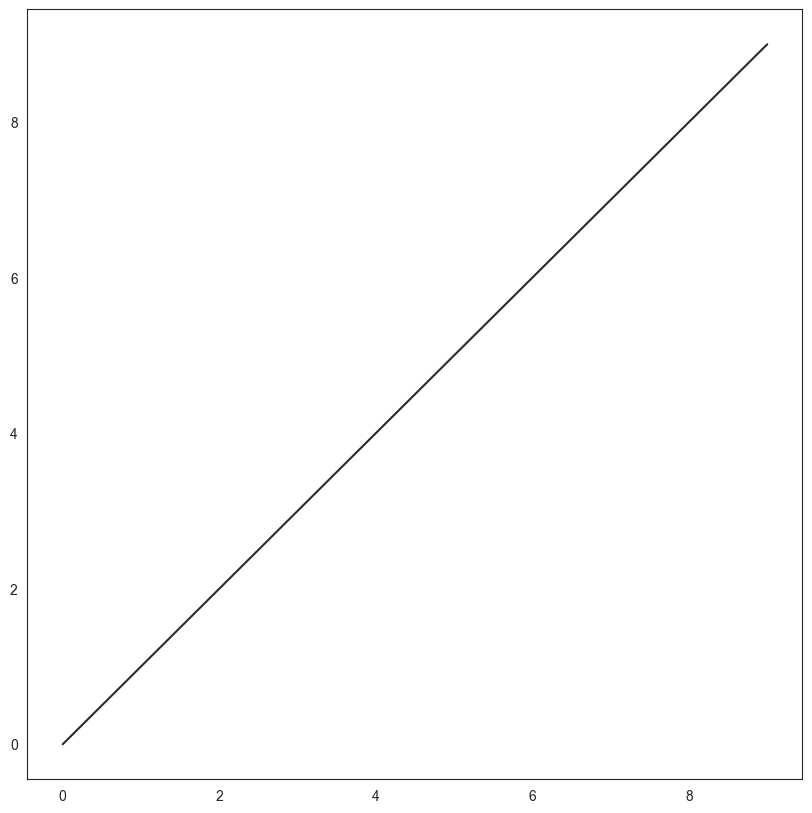

In [182]:
plt.plot(data)

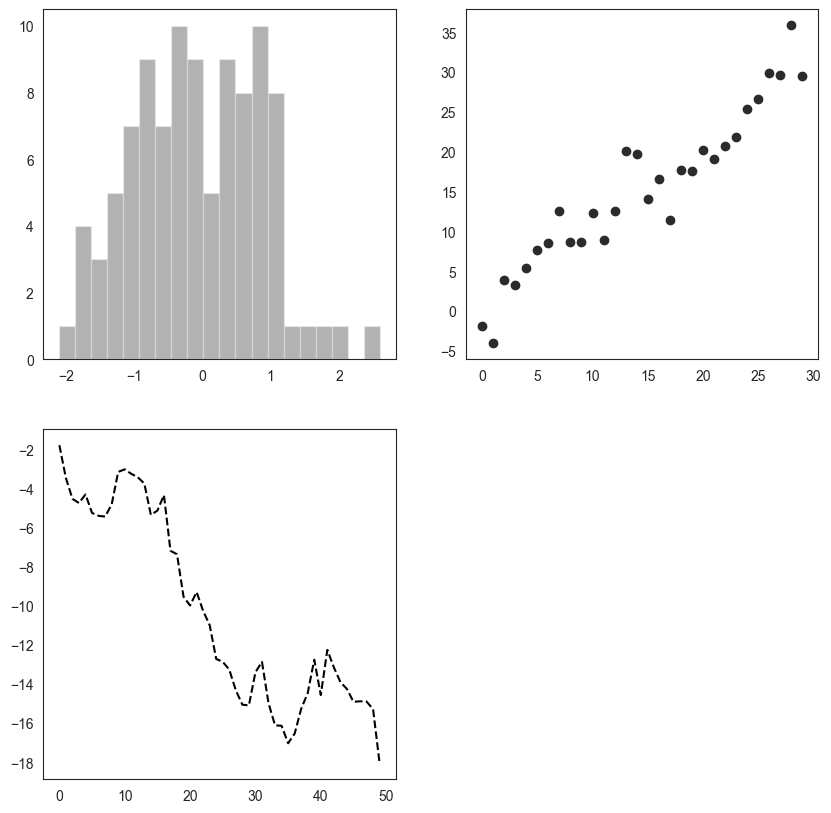

In [183]:
# Creating a figure object
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# Plots
ax3.plot(np.random.standard_normal(50).cumsum(),
         color="black",
        linestyle="dashed");
# ';' used to supress the output about the object added to the plot
ax1.hist(np.random.standard_normal(100),
         bins=20,
         color="black",
         alpha=0.3);
ax2.scatter(np.arange(30),
            np.arange(30) + 3*np.random.standard_normal(30));

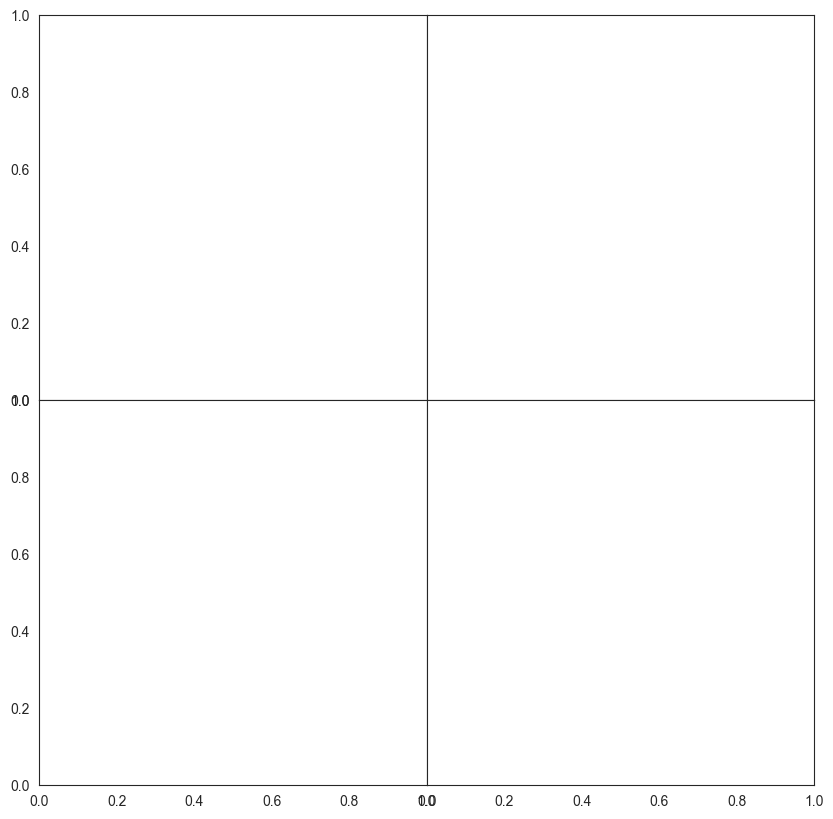

In [184]:
fig, axes = plt.subplots(2, 2,
                        sharex=True,
                        sharey=True)
fig.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=0,
                    hspace=0)

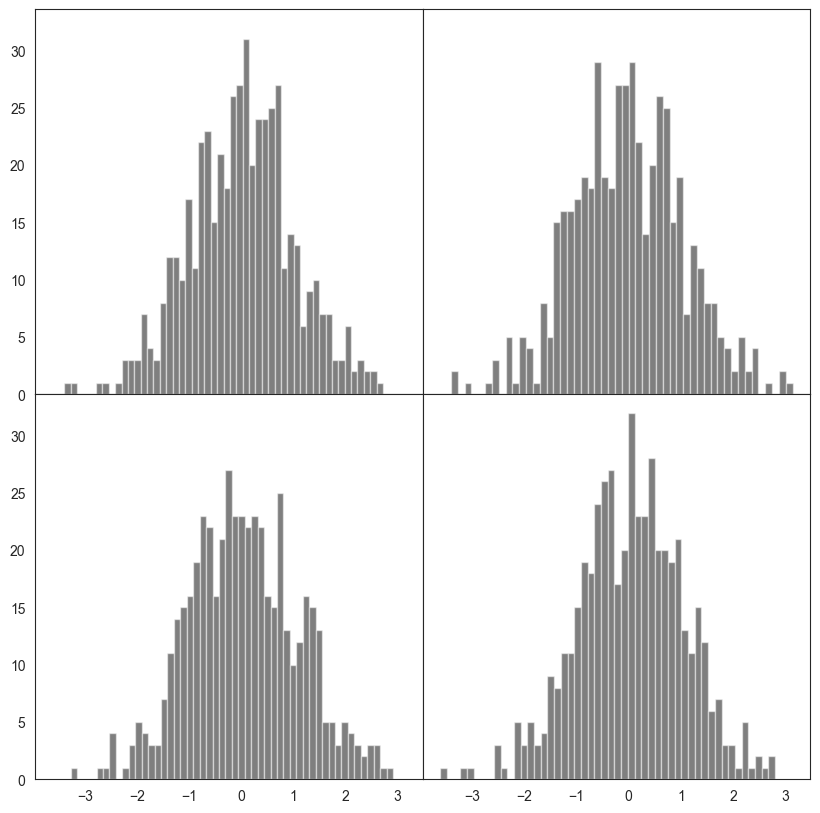

In [185]:
# adjusting wspace, hspace
fig, axes = plt.subplots(2, 2, sharex=True,
                         sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500),
                        bins=50,
                        color='black',
                        alpha=0.5)
fig.subplots_adjust(wspace=0,
                    hspace=0)

In [186]:
# supported
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

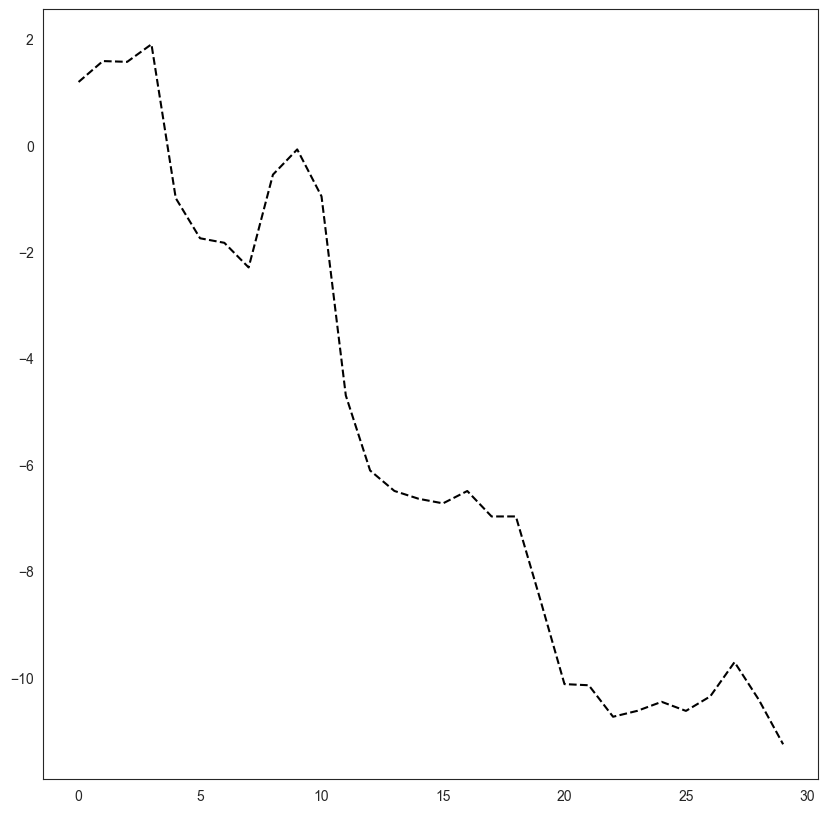

In [187]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(),
        color="black",
        linestyle="dashed",
        # marker="0"
       );

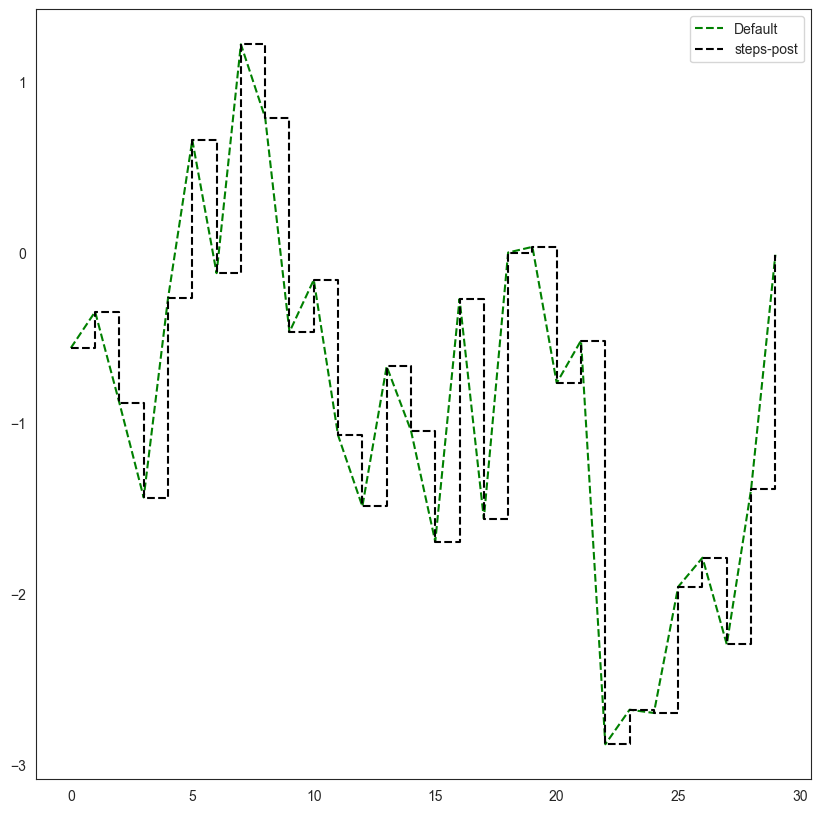

In [188]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data,
        color='green',
        linestyle='dashed',
        label='Default',
       );
ax.plot(data, color='black',
        linestyle='dashed',
        drawstyle='steps-post',
        label="steps-post",
       );
ax.legend();

<h3>Ticks, Labels and Legends</h3>

In [189]:
# Getting and settig xlim, ylim of the active or current subplot
ax.get_xlim()
ax.get_ylim()

(-3.0863055950118974, 1.4254135582718213)

Text(0.5, 1.0, 'This plot')

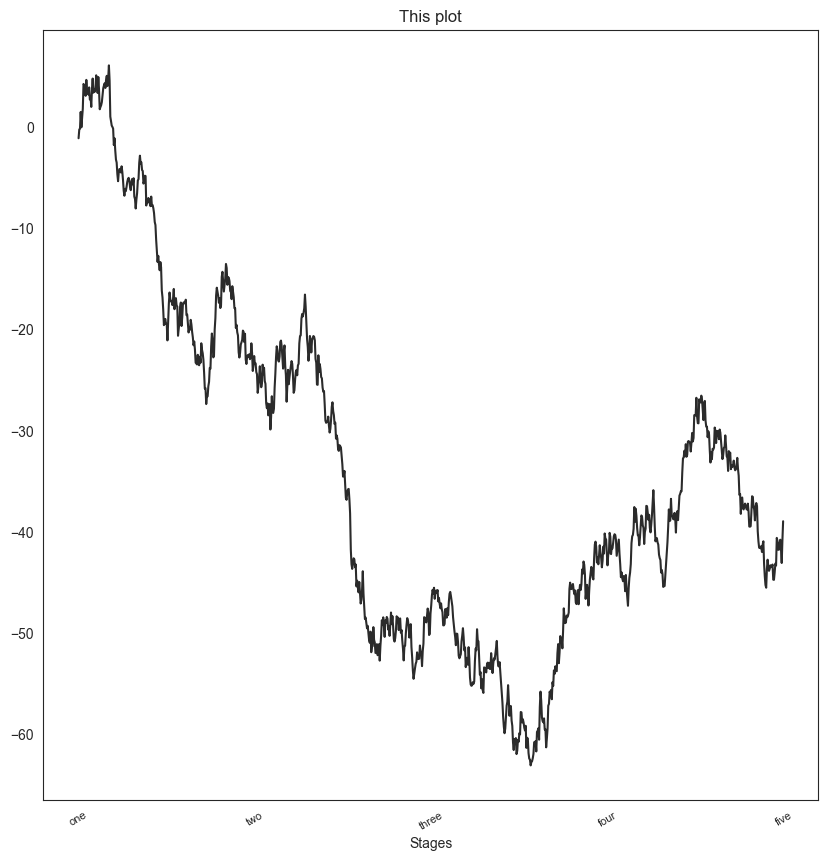

In [190]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1_000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 750, 1_000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30,
                           fontsize=8,

                           )
# label the x-axis
ax.set_xlabel("Stages")

# plot title
ax.set_title("This plot")

<h3>Legends</h3>
<p>Legends aid to identify the different plots on a graph</p>

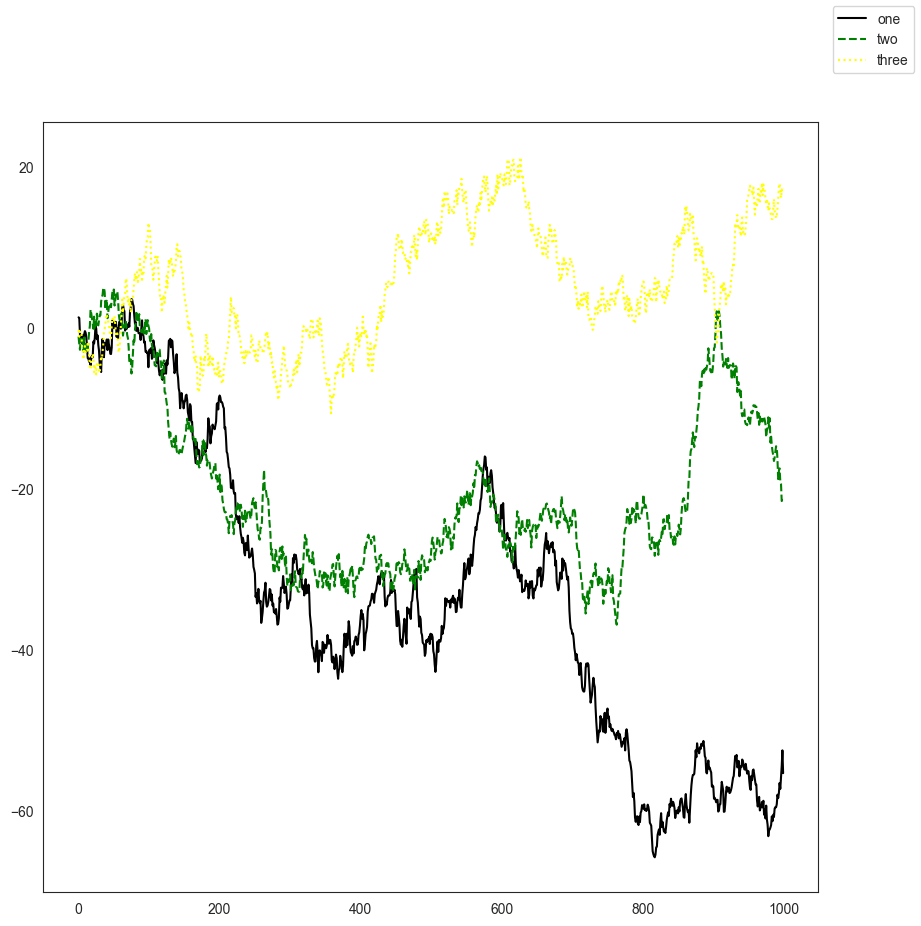

In [191]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1_000).cumsum(),
       color="black",
       label="one");
ax.plot(np.random.randn(1_000).cumsum(),
        color="green",
        linestyle="dashed",
        label="two"
       );
ax.plot(np.random.randn(1_000).cumsum(),
        color='yellow',
        linestyle='dotted',
        label="three");
fig.legend()

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

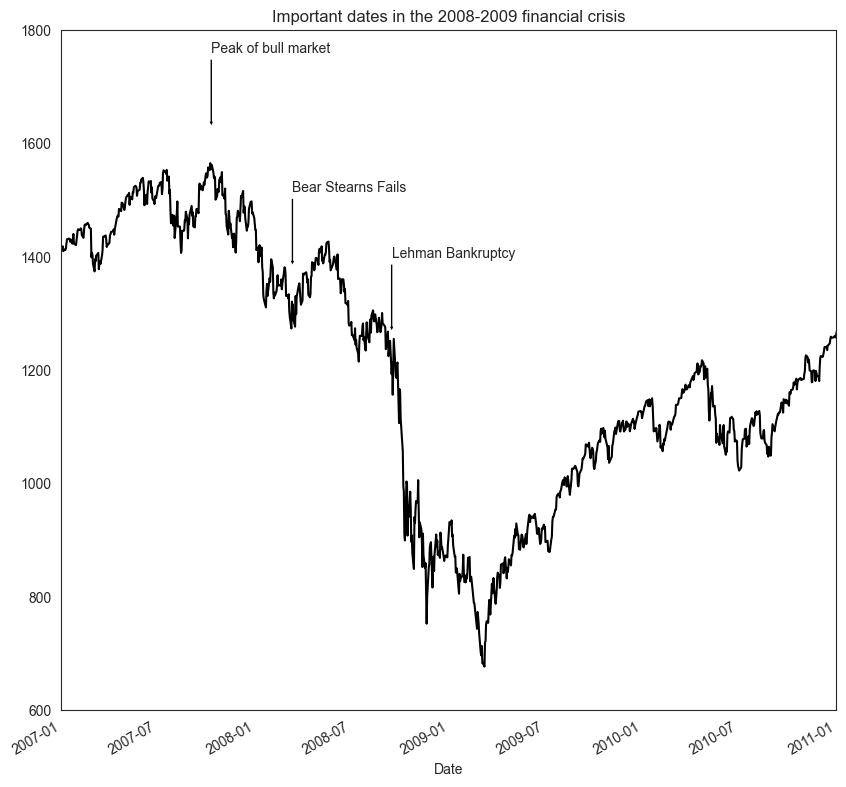

In [192]:
from datetime import datetime
fig, ax = plt.subplots()
data = pd.read_csv("../Data/spx.csv", index_col=0,
                   parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, color='black')
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext = (date, spx.asof(date) + 225),
                          arrowprops=dict(facecolor='black',
                                          headwidth=4,
                                          width=2,
                                          headlength=4),
    horizontalalignment='left',
    verticalalignment='top')
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")

<h3>Shapes</h3>

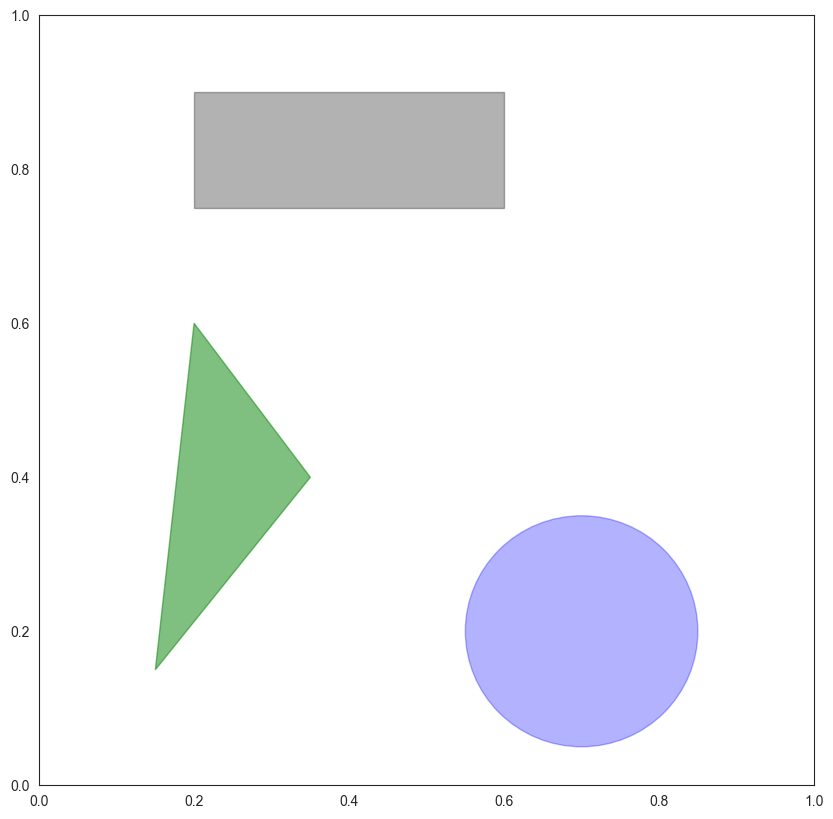

In [193]:
fig, ax = plt.subplots()
rect = plt.Rectangle((0.2, 0.75),
                     0.4, 0.15,
                     color="black",
                     alpha=0.3)
circ = plt.Circle((0.7, 0.2),
                  0.15,
                  color="blue",
                  alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15],
                    [0.35, 0.4],
                    [0.2, 0.6]],
                   color="green",
                   alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [194]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
       

In [195]:
plt.rc("figure", figsize=(10, 10))

In [196]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
       

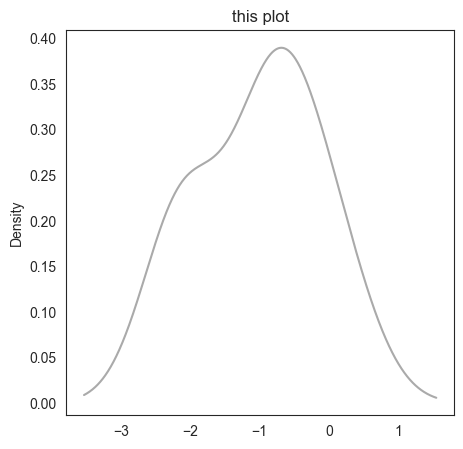

In [197]:
# Line Plots
# plt.rc("figure", figsize=(10, 10))
s = pd.Series(np.random.standard_normal(10).cumsum(),
              index=np.arange(0, 100, 10))
s.plot(
    figsize=(5, 5),
    alpha=0.4,
    label="this graph",
    # style="ko-",
    kind="kde",
    # logx=True,
    title="this plot",
    use_index=True,
);

In [198]:
# Plotting dataframe
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

In [199]:
df

,A,B,C,D
0,0.834013,-0.535769,0.857402,-1.782410
10,-1.219146,-0.889591,1.701139,-0.428674
20,-2.286648,-0.685621,1.267949,1.251385
30,-3.414193,0.493031,1.619605,0.434890
40,-3.434939,1.249815,2.336102,2.503184
50,-4.348852,0.373339,2.789997,2.909278
60,-3.897705,-1.255305,3.932930,4.577717
70,-4.424881,-0.637525,3.403944,4.124280
80,-5.112687,0.625111,4.479445,2.941513
90,-6.434405,-0.280312,4.727970,2.323248


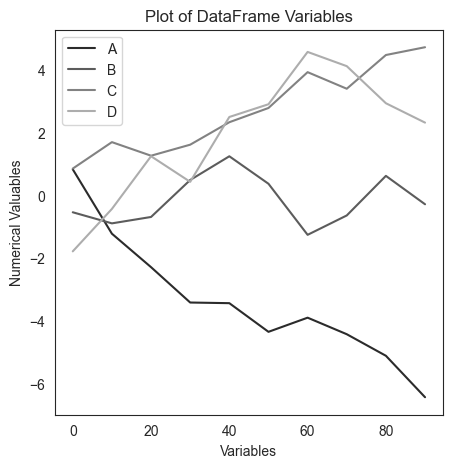

In [200]:
# plt.style.use('grayscale')
df.plot(figsize=(5, 5),
        title="Plot of DataFrame Variables",
        xlabel="Variables",
        ylabel="Numerical Valuables",
       );

In [201]:
# A Graduation DataFrame
grad = pd.DataFrame({"Graduates": [500, 631, 750, 893, 503, 819],
                     "First Classes": [30, 43, 81, 100, 210, 84],
                    },
                    index = ["CEDAT", "CoNAS", "CHS", "CEES", "CoBAMS", "CoVABS"],
                   )

In [202]:
grad

,Graduates,First Classes
CEDAT,500,30
CoNAS,631,43
CHS,750,81
CEES,893,100
CoBAMS,503,210
CoVABS,819,84


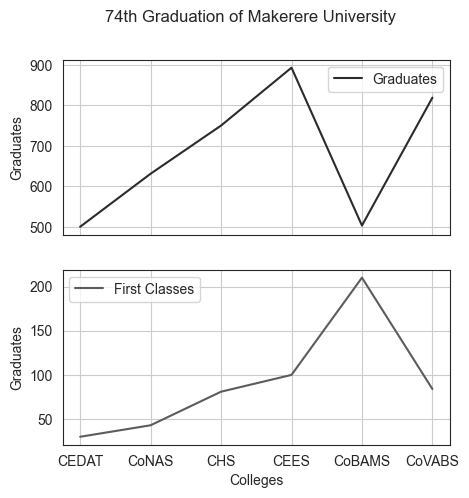

In [203]:
grad.plot(
    figsize=(5, 5),
    title="74th Graduation of Makerere University",
    xlabel="Colleges",
    ylabel="Graduates",
    grid=True,
    subplots=True,
);

<h3>Bar Plots</h3>
<p>pandas.plot.bar() and pandas.plot.barh() plot vertical and horizontal bars respectively.</p>

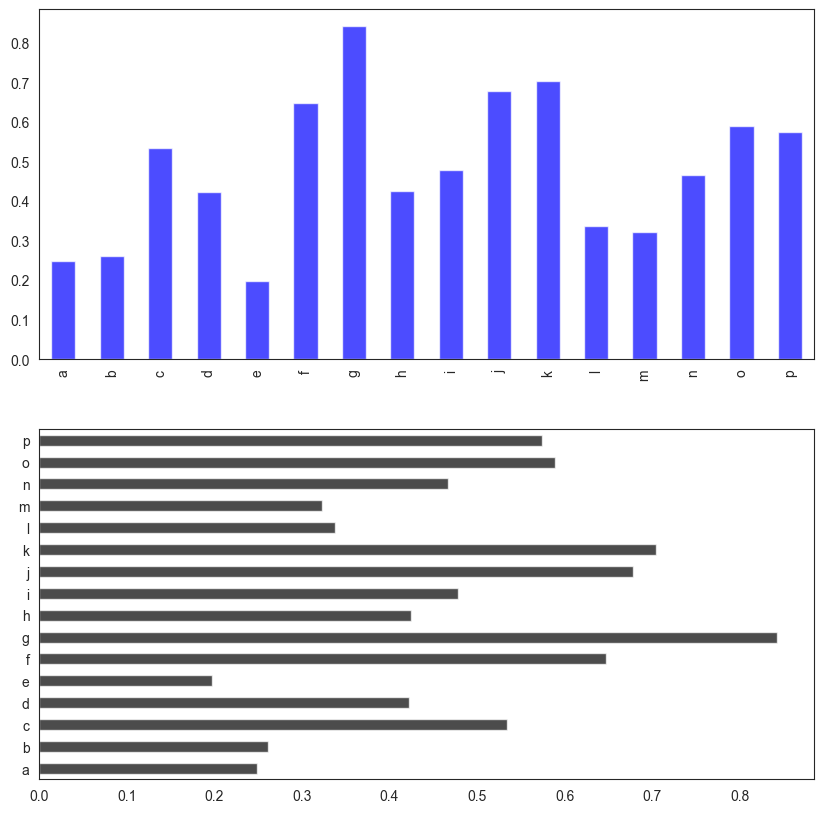

In [204]:
fig, axes = plt.subplots(2, 1)
# plt.style.use('grayscale');
data = pd.Series(np.random.uniform(size=16),
                 index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0],
              color="blue",
              alpha=0.7,
             );
data.plot.barh(ax=axes[1],
               color="black",
               alpha=0.7,
              );

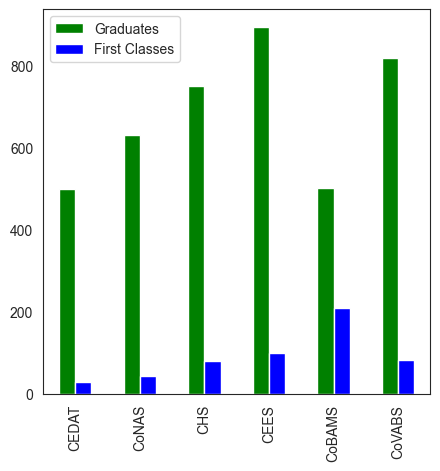

In [205]:
# Plotting grauation bar graphs
grad.plot.bar(
    figsize=(5,5),
    color=["Green", "Blue"],
);

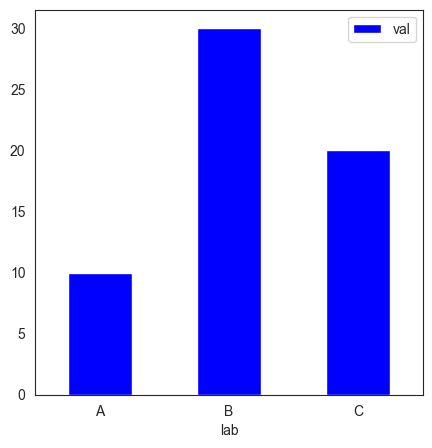

In [206]:
# More examples
df = pd.DataFrame({'lab': ['A', 'B', 'C'],
                   'val': [10, 30, 20]})
ax = df.plot.bar(x='lab',
                 y='val',
                 rot=0,
                figsize=(5, 5),
                 color="blue",
                );

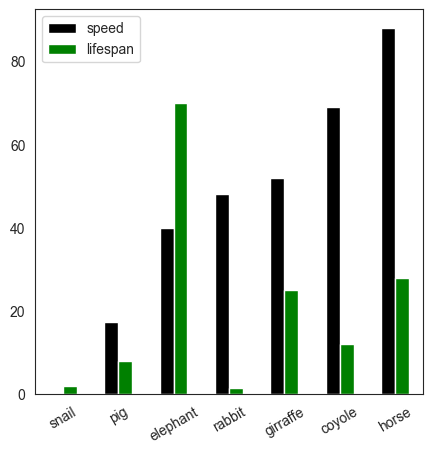

In [207]:
# TO-DO: Change background color to white
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant', 'rabbit', 'girraffe', 'coyole', 'horse']
df = pd.DataFrame({"speed": speed,
                   "lifespan": lifespan},
                   index=index,
                 )
# A bar plot
df.plot.bar(figsize=(5,5),
            color=['black', 'green'],
    rot=30);

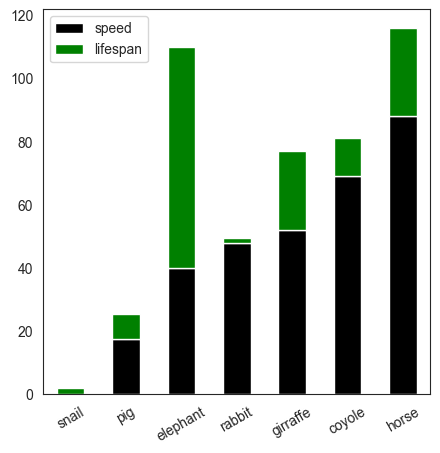

In [208]:
df.plot.bar(figsize=(5,5),
            color=['black', 'green'],
            stacked=True,
    rot=30);

In [209]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"],
                                   name="Genus"))
df

Genus,A,B,C,D
one,0.184289,0.450169,0.870097,0.899477
two,0.603267,0.021220,0.549114,0.091201
three,0.844991,0.261828,0.893590,0.771959
four,0.809812,0.007411,0.416679,0.242225
five,0.480890,0.780142,0.341308,0.301859
six,0.469932,0.293367,0.957340,0.930940


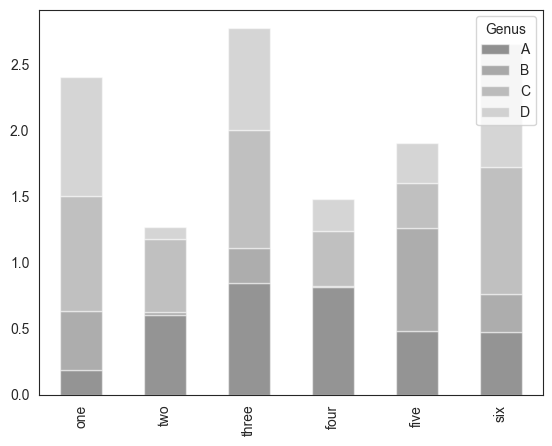

In [210]:
df.plot.bar(
    figsize=(6.5, 5),
    stacked=True,
    # color=['black', 'yellow', 'red', 'green'],
    alpha=0.5,
);

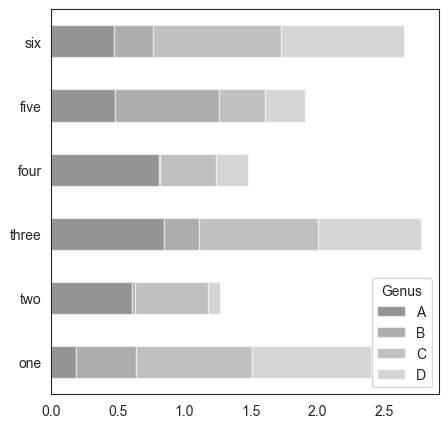

In [211]:
df.plot.barh(stacked=True,
             figsize=(5,5),
             alpha=0.5);

<h3>Coffee Price Trends</h3>

<ul>
    <li>Preprocessing</li>
    <li>Visualization</li>
    <li>Time Series</li>
    <li>Trending analysis</li>
</ul>

In [212]:
# Read excel
coffeePriceTrends = pd.read_excel("../Data/Coffee/Price_Trend_1992_93_2015_USD.xls")

dfcolumns = coffeePriceTrends.columns
dfcolumns[0]
# coffeePriceTrends
coffeePriceTrends = coffeePriceTrends.drop([dfcolumns[0], dfcolumns[-1]], axis=1).dropna(how="any")
# Get column names
newColumns = coffeePriceTrends.iloc[0, :].tolist()

# print("newColumns: ")
# print(newColumns)
# print("\n")

coffeePriceTrends = coffeePriceTrends.drop(3, )
# print(coffeePriceTrends.columns)

dictPrice = {coffeePriceTrends.columns[x]: newColumns[x] for x in range(len(newColumns))}
# print(dictPrice)
coffeePriceTrends = coffeePriceTrends.rename(dictPrice,
                                            axis=1,
                                            )
coffeePriceTrends = coffeePriceTrends.set_index('MONTH')

# Create a multiIndex
index = pd.MultiIndex.from_arrays([["UGX", "UGX", "UGX", "EX.RATE", "USD", "USD", "USD"], ["ROBUSTA KIBOKO", "ROBUSTA FAQ", "ARABICA PARCHMENT", "EX.RATE Sh/Kg", "ROBUSTA KIBOKO", "ROBUSTA FAQ", "ARABICA PARCHMENT"]])


coffeePriceTrends.columns = index

# coffeePriceTrends

In [213]:
coffeePriceTrendsUGX = coffeePriceTrends['UGX']

In [214]:
coffeePriceTrends

UGX                                \
                    ROBUSTA KIBOKO ROBUSTA FAQ ARABICA PARCHMENT   
MONTH                                                              
1992-07-01 00:00:00            210         420               499   
1992-08-01 00:00:00            220         440               500   
1992-09-01 00:00:00            215         400               502   
1992-10-01 00:00:00            225         450               510   
1992-11-01 00:00:00            250         500               550   
...                            ...         ...               ...   
2015-05-01 00:00:00           2200        4320              5600   
2015-06-01 00:00:00           2250        4500              5750   
2015-07-01 00:00:00           2200        4350              5850   
2015-08-01 00:00:00           2200        4500              6250   
2015-09-01 00:00:00           2150        4250              5750   

                          EX.RATE            USD                                
                    EX.RATE Sh/Kg ROBUSTA KIBOKO ROBUSTA FAQ ARABICA PARCHMENT  
MONTH                                                                           
1992-07-01 00:00:00       1177.86       0.178289    0.356579           0.42365  
1992-08-01 00:00:00       1185.29       0.185609    0.371217          0.421838  
1992-09-01 00:00:00       1185.15       0.181412     0.33751          0.423575  
1992-10-01 00:00:00       1181.07       0.190505     0.38101          0.431812  
1992-11-01 00:00:00       1196.34       0.208971    0.417941          0.459736  
...                           ...            ...         ...               ...  
2015-05-01 00:00:00        3007.6        0.73148    1.436361           1.86195  
2015-06-01 00:00:00        3199.9       0.703147    1.406294          1.796931  
2015-07-01 00:00:00       3360.09       0.654744    1.294608          1.741025  
2015-08-01 00:00:00       3548.25       0.620024    1.268231          1.761432  
2015-09-01 00:00:00        3667.5        0.58623    1.158828          1.567825  

[279 rows x 7 columns]

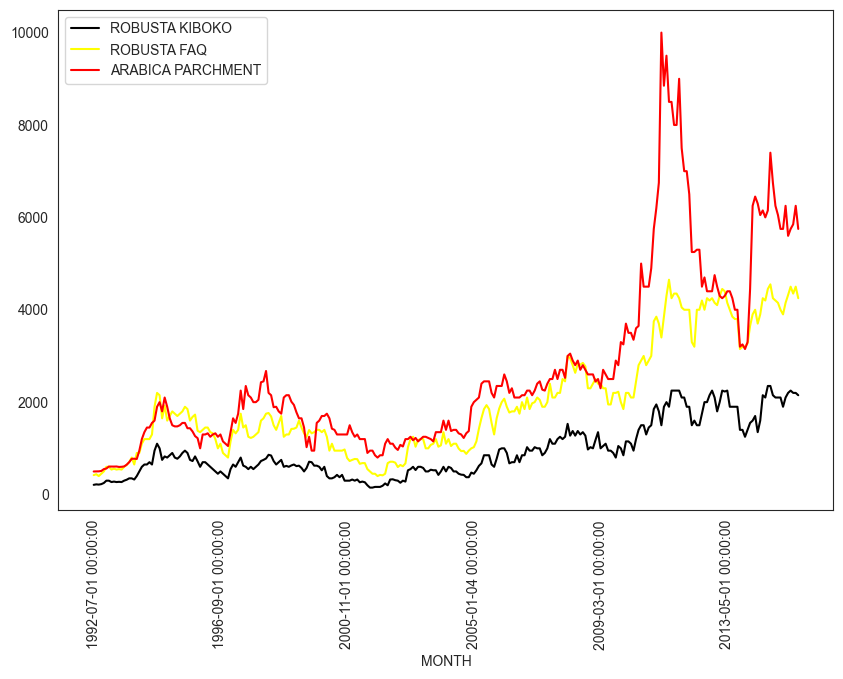

In [215]:
coffeePriceTrendsUGX.plot(
    rot=90,
    color=['black', 'yellow', 'red'],
    figsize=(10, 6.5),
);

# The USD graph may take the same shape: false

In [216]:
coffeePriceTrendsUSD = coffeePriceTrends['USD']

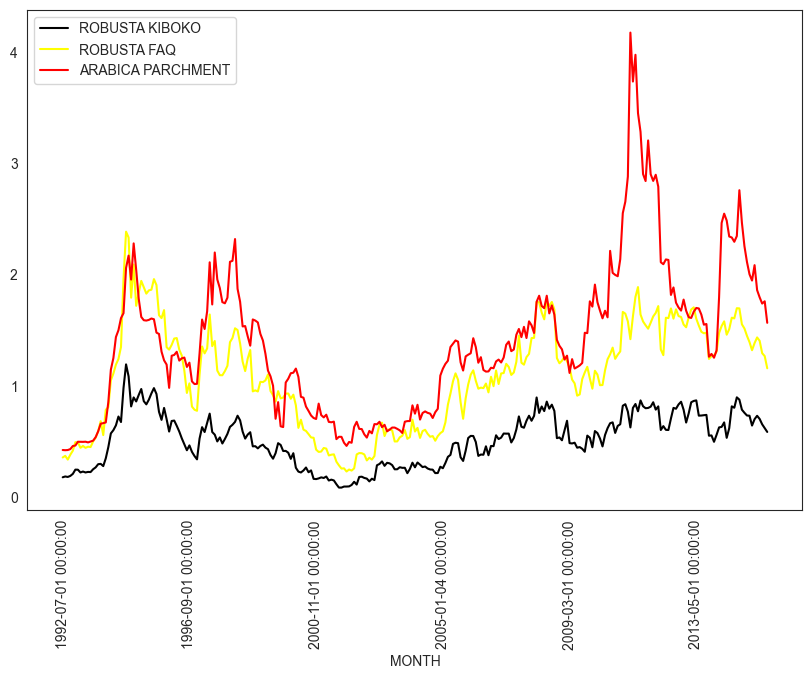

In [217]:
coffeePriceTrendsUSD.plot(
    figsize=(10, 6.5),
    color=['black', 'yellow', 'red'],
    rot=90,
);

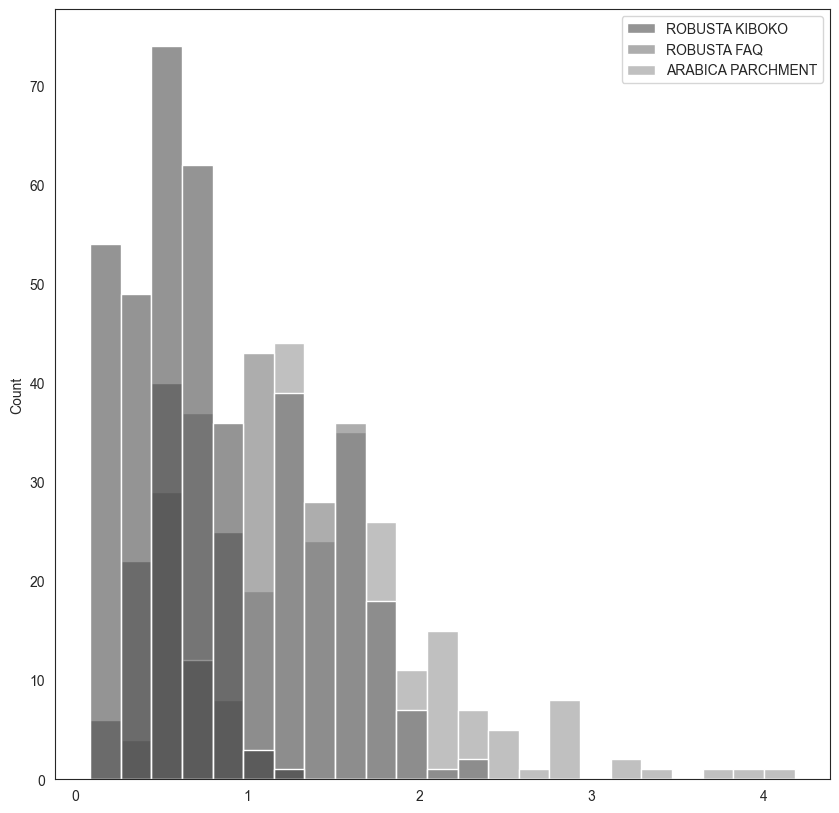

In [218]:
sns.histplot(data=coffeePriceTrendsUSD,
             # x="MONTH",
             # y="USD",
            );

<h3>Tips Data</h3>

In [416]:
tips = pd.read_csv('../Data/tips.csv')

In [418]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [221]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [222]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [223]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])

In [224]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [225]:
# Removing column:1 and column:6
party_counts = party_counts.loc[:, 2:5]

In [226]:
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [227]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                 axis="index")

In [228]:
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


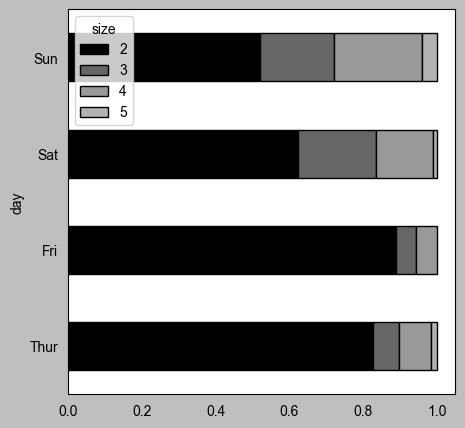

In [229]:
plt.style.use('grayscale')
party_pcts.plot.barh(
    stacked=True,
    figsize=(5, 5),
);

In [230]:
# tips percentage
tips["tip_pct"] = tips['tip'] / (tips['total_bill']-tips["tip"])

In [231]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


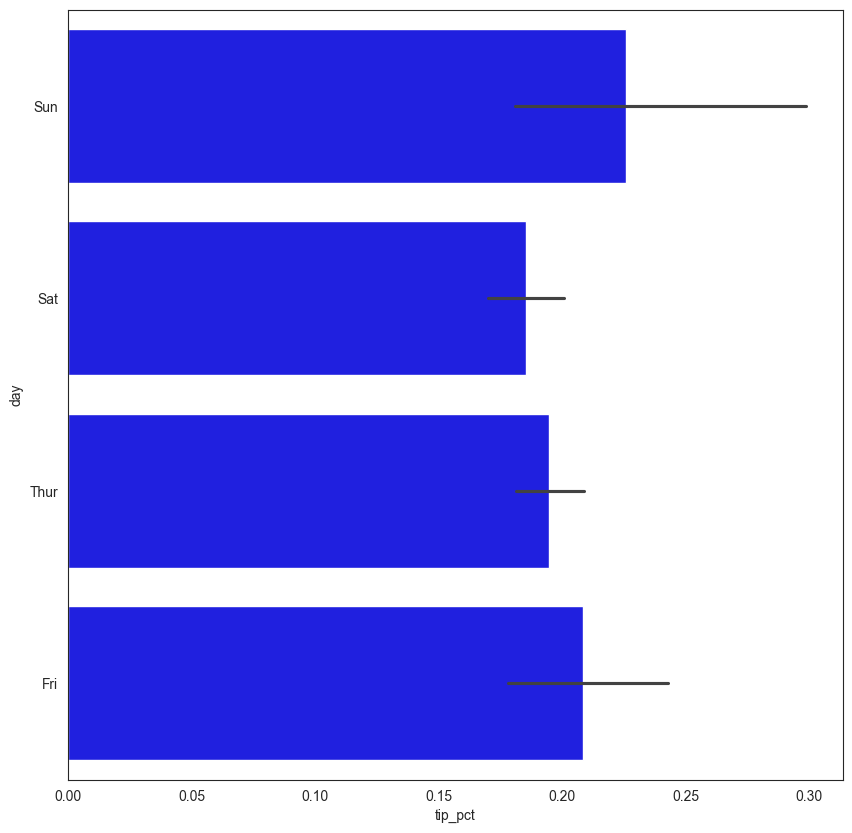

In [232]:
sns.set_style("white")
sns.barplot(x="tip_pct",
            y="day",
            data=tips,
            orient="h",
            color="blue",
            # capsize=0.2,
            # width=0.25,
           );

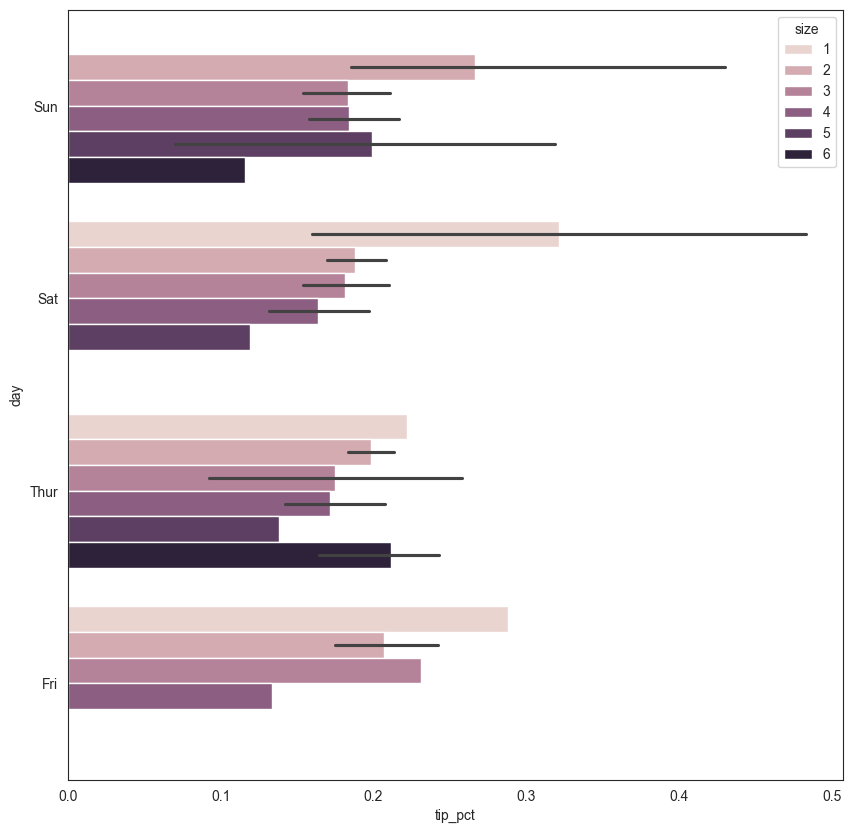

In [233]:
# hue enables to split aggregated data, say by time, smoker, size
# set palette color
# sns.set_palette("Greys_r")
sns.barplot(x="tip_pct",
            y="day",
            hue="size",
            data=tips,
            orient="h",
           );


<h3>Histograms and Density Plots</h3>
<p>A histogram is a representation of data <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist">distribution</a>.</p>

In [234]:
tips['tip_pct']

0      0.063204
1      0.191244
2      0.199886
3      0.162494
4      0.172069
         ...   
239    0.256166
240    0.079428
241    0.096759
242    0.108899
243    0.190114
Name: tip_pct, Length: 244, dtype: float64

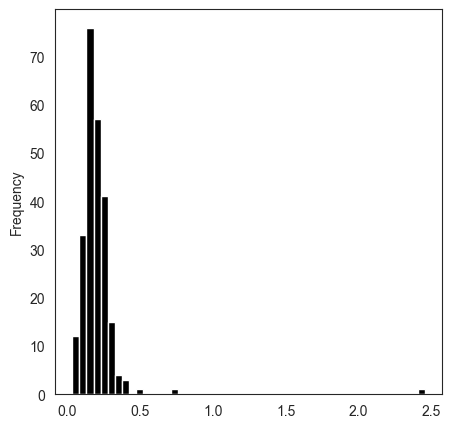

In [235]:
tips['tip_pct'].plot.hist(
    bins=50,
    figsize=(5, 5),
);

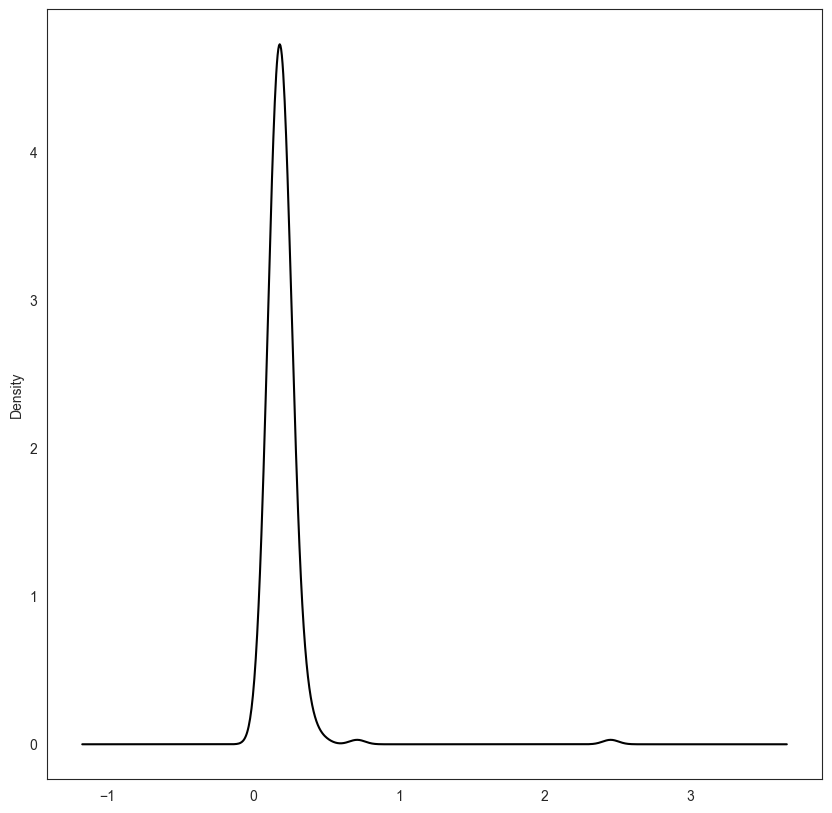

In [236]:
tips['tip_pct'].plot.density();

In [237]:
comp1 = np.random.standard_normal(200)
comp2 = 10+2*np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

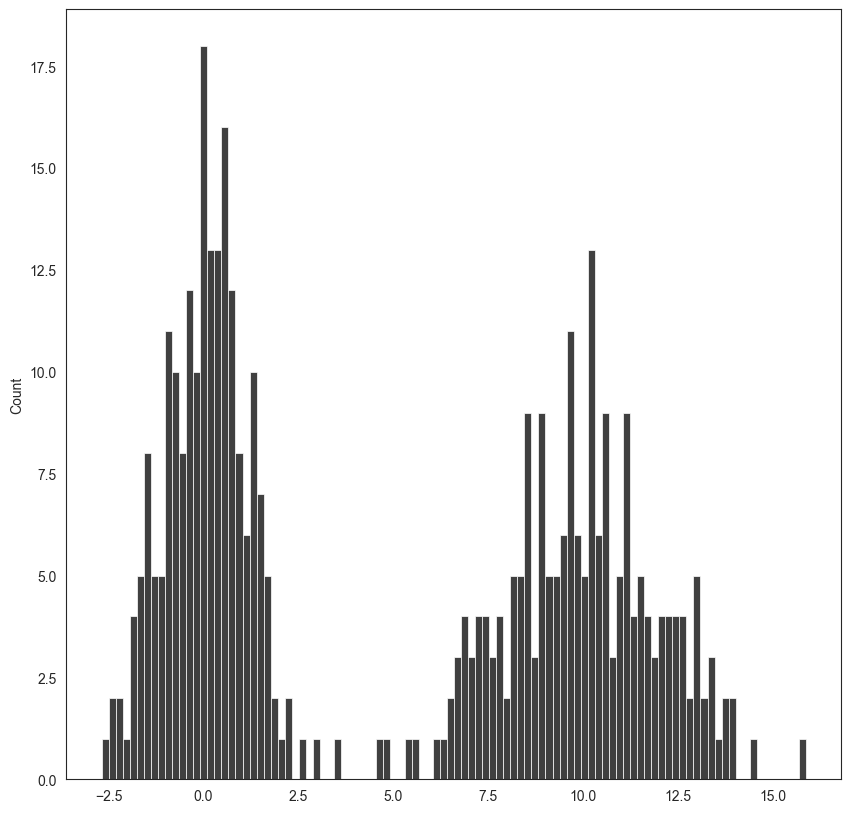

In [238]:
# bimodal distribution
sns.histplot(values,
             bins=100,
             color='black',
            );

<h3>Penguins Dataset</h3>

In [240]:
# Datasets in sns
# sns.get_dataset_names()

In [ ]:
penguins = sns.load_dataset("penguins")
penguins

In [ ]:
sns.histplot(data=penguins,
             x="flipper_length_mm",
            );

<h3>Scatter Plots</h3>
<p>A scatter plot plots data and a line <a href="https://seaborn.pydata.org/generated/seaborn.regplot.html">regression model fit</a>.</p>

In [241]:
macro = pd.read_csv("../Data/macrodata.csv")

In [242]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

In [243]:
trans_data = np.log(data).diff().dropna()

In [244]:
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


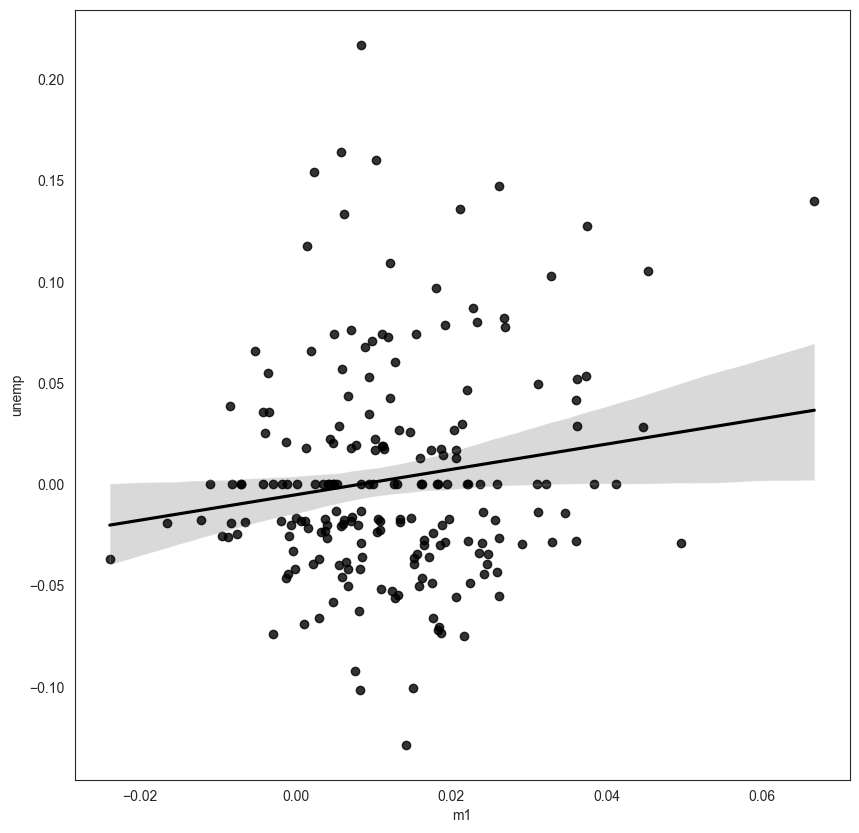

In [245]:
# What is a scatter plot
ax = sns.regplot(x="m1",
                 y="unemp",
                 data=trans_data,
                );

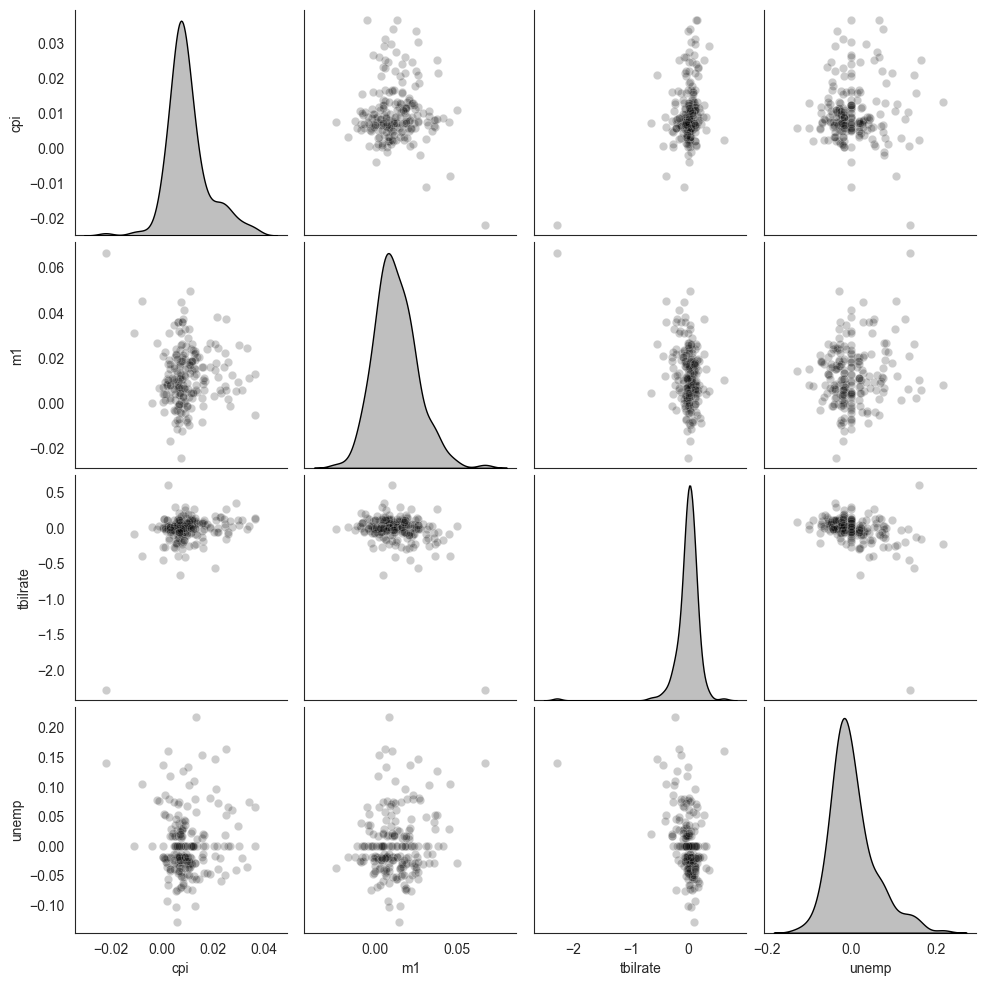

In [246]:
# Pair plot
sns.pairplot(trans_data,
             diag_kind='kde',
             plot_kws={"alpha": 0.2});

<h3>Facet Grids and Categorical Data</h3>

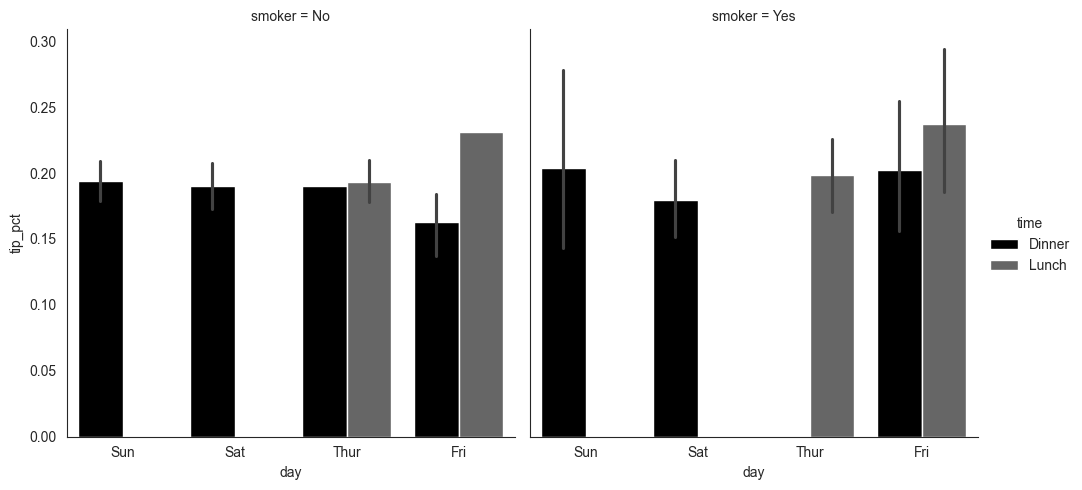

In [247]:
sns.catplot(x="day",
            y="tip_pct",
            hue="time",
            col="smoker",
            kind="bar",
            data=tips[tips.tip_pct<1],
           );

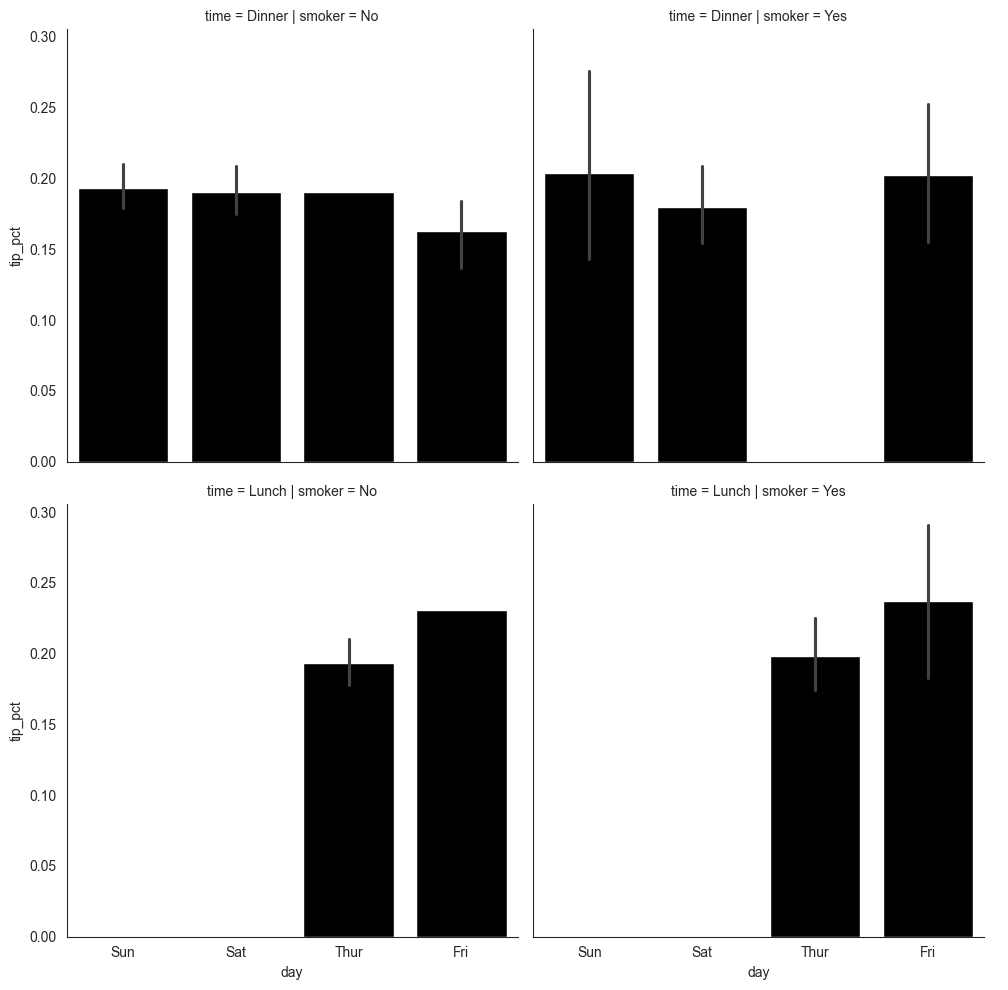

In [250]:
sns.catplot(x="day",
            y="tip_pct",
            row="time",
            col="smoker",
            kind="bar",
            data=tips[tips.tip_pct<1],
           );

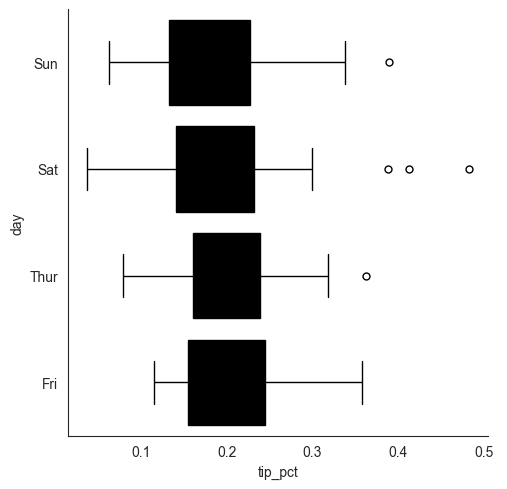

In [251]:
sns.catplot(
    x="tip_pct",
    y="day",
    kind="box",
    data=tips[tips.tip_pct < 0.5],
);

<h3>Other Resources</h3>
<ul>
    <li>Fundamentals of Data Visualization: Claus O. Wilke</li>
    <li>Visualizing Graph Data: Corey Lanum</li>
    <li>Everyday Data Visualization: Desire Abott</li>
    <li>Data Visualization with Python and JavaScript: Kryan Dale</li>
</ul>

<h1>Data Aggregation and Group Operations</h1>

<h3>Group By</h3>

In [2]:
df = pd.DataFrame({
    "key1": ["a", "a", None, "b", "b", "a", None],
    "key2": pd.Series([1, 2, 1, 2, 1, None, 1], dtype="Int64"),
    "data1": np.random.standard_normal(7),
    "data2": np.random.standard_normal(7)
})

In [3]:
df

,key1,key2,data1,data2
0,a,1,0.008330,-0.671590
1,a,2,-0.139021,0.837491
2,None,1,1.080279,-0.334925
3,b,2,0.986169,-0.917229
4,b,1,-1.297522,0.828132
5,a,<NA>,1.286206,1.378676
6,None,1,-0.500527,-0.023043


In [4]:
grouped = df['data1'].groupby(df['key1'])

In [5]:
grouped.mean()

key1
a    0.385171
b   -0.155677
Name: data1, dtype: float64

In [6]:
means = df['data1'].groupby([df['key1'],
                            df['key2']]).mean()

In [7]:
means

key1  key2
a     1       0.008330
      2      -0.139021
b     1      -1.297522
      2       0.986169
Name: data1, dtype: float64

In [8]:
means.unstack()

key2,1,2
key1,,
a,0.008330,-0.139021
b,-1.297522,0.986169


In [9]:
states = np.array(["OH", "CA", "CA", "OH", "OH", "CA", "OH"])
years = [2005, 2005, 2006, 2005, 2006, 2005, 2006]
df['data1'].groupby([states, years]).mean()

CA  2005    0.573592
    2006    1.080279
OH  2005    0.497249
    2006   -0.899025
Name: data1, dtype: float64

In [10]:
expenses  = pd.Series(np.arange(3, 10) * 1_000_000, dtype="Int64")

In [11]:
expenses

0    3000000
1    4000000
2    5000000
3    6000000
4    7000000
5    8000000
6    9000000
dtype: Int64

In [12]:
colleges = ["CEDAT", "CEDAT", "CEDAT", "CONAS", "CONAS", "CONAS", "CEDAT"]
fyQuarter = ["Q1", "Q4", "Q3", "Q1", "Q3", "Q2", "Q4"]

In [13]:
expenses.groupby([colleges, fyQuarter]).mean()

CEDAT  Q1    3000000.0
       Q3    5000000.0
       Q4    6500000.0
CONAS  Q1    6000000.0
       Q2    8000000.0
       Q3    7000000.0
dtype: Float64

In [14]:
# Find size in each category
expenses.groupby([colleges, fyQuarter]).size()

CEDAT  Q1    1
       Q3    1
       Q4    2
CONAS  Q1    1
       Q2    1
       Q3    1
dtype: Int64

In [15]:
# grouping by keys in the same dataframe
df.groupby("key1").mean()

,key2,data1,data2
key1,,,
a,1.5,0.385171,0.514859
b,1.5,-0.155677,-0.044548


In [16]:
df.groupby(["key1", "key2"]).mean()

data1     data2
key1 key2                    
a    1     0.008330 -0.671590
     2    -0.139021  0.837491
b    1    -1.297522  0.828132
     2     0.986169 -0.917229

In [17]:
df.groupby(["key1", "key2"]).size()

key1  key2
a     1       1
      2       1
b     1       1
      2       1
dtype: int64

In [18]:
df.groupby("key1", dropna=False).size()

key1
a      3
b      2
NaN    2
dtype: int64

In [19]:
df.groupby(["key1", "key2"],
           dropna=False).size()

key1  key2
a     1       1
      2       1
      <NA>    1
b     1       1
      2       1
NaN   1       2
dtype: int64

In [20]:
df.groupby("key1").count()

,key2,data1,data2
key1,,,
a,2,3,3
b,2,2,2


In [21]:
df

,key1,key2,data1,data2
0,a,1,0.008330,-0.671590
1,a,2,-0.139021,0.837491
2,None,1,1.080279,-0.334925
3,b,2,0.986169,-0.917229
4,b,1,-1.297522,0.828132
5,a,<NA>,1.286206,1.378676
6,None,1,-0.500527,-0.023043


<h3>Iterating over groups</h3>
<p>The returned groupby object is iterable.</p>

In [22]:
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1  key2     data1     data2
0    a     1  0.008330 -0.671590
1    a     2 -0.139021  0.837491
5    a  <NA>  1.286206  1.378676
b
  key1  key2     data1     data2
3    b     2  0.986169 -0.917229
4    b     1 -1.297522  0.828132


In [23]:
# multiple key groupby
for (k1, k2), group in df.groupby(["key1", "key2"]):
    print((k1, k2))
    print(group)

('a', 1)
  key1  key2    data1    data2
0    a     1  0.00833 -0.67159
('a', 2)
  key1  key2     data1     data2
1    a     2 -0.139021  0.837491
('b', 1)
  key1  key2     data1     data2
4    b     1 -1.297522  0.828132
('b', 2)
  key1  key2     data1     data2
3    b     2  0.986169 -0.917229


In [24]:
pieces = {name: group for name, group in df.groupby("key1")}

In [25]:
pieces

{'a':   key1  key2     data1     data2
 0    a     1  0.008330 -0.671590
 1    a     2 -0.139021  0.837491
 5    a  <NA>  1.286206  1.378676,
 'b':   key1  key2     data1     data2
 3    b     2  0.986169 -0.917229
 4    b     1 -1.297522  0.828132}

In [26]:
pieces['a']

,key1,key2,data1,data2
0,a,1,0.008330,-0.671590
1,a,2,-0.139021,0.837491
5,a,<NA>,1.286206,1.378676


In [27]:
pieces['b']

,key1,key2,data1,data2
3,b,2,0.986169,-0.917229
4,b,1,-1.297522,0.828132


In [28]:
grouped = df.T.groupby({"key1": "key",
                      "key2": "key",
                      "data1": "data",
                      "data2": "data"})                     

In [29]:
grouped.count()

,0,1,2,3,4,5,6
data,2,2,2,2,2,2,2
key,2,2,1,2,2,1,1


In [30]:
for group_key, group_values in grouped:
    print(group_key)
    print(group_values)

data
             0         1         2         3         4         5         6
data1  0.00833 -0.139021  1.080279  0.986169 -1.297522  1.286206 -0.500527
data2 -0.67159  0.837491 -0.334925 -0.917229  0.828132  1.378676 -0.023043
key
      0  1     2  3  4     5     6
key1  a  a  None  b  b     a  None
key2  1  2     1  2  1  <NA>     1


<h3>Selecting a column or a subset of columns</h3>

In [31]:
df.groupby("key1")[["data2"]]

In [32]:
# this aggregates by a subset of columns as returns a dataframe
df.groupby(["key1", "key2"])[["data2"]].mean()

data2
key1 key2          
a    1    -0.671590
     2     0.837491
b    1     0.828132
     2    -0.917229

In [33]:
# This aggregates by a column and returns a series
df.groupby(["key1", "key2"])["data2"].mean()

key1  key2
a     1      -0.671590
      2       0.837491
b     1       0.828132
      2      -0.917229
Name: data2, dtype: float64

In [34]:
s_grouped = df.groupby(["key1", "key2"])["data2"]

In [35]:
s_grouped.mean()

key1  key2
a     1      -0.671590
      2       0.837491
b     1       0.828132
      2      -0.917229
Name: data2, dtype: float64

<h3>Grouping with Dictionaries and Series</h3>

In [36]:
people = pd.DataFrame(np.random.standard_normal((5,5)),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wanda', 'Jill', 'Trey'])

In [37]:
people

,a,b,c,d,e
Joe,0.907148,1.103181,-0.340158,-0.588474,-0.059963
Steve,-1.035499,0.640829,1.329829,-2.140566,0.160262
Wanda,0.175551,-1.443766,-0.575974,1.025832,-0.771150
Jill,-0.408643,0.593346,-0.144713,-0.531152,-1.387050
Trey,0.319329,0.785308,-0.798161,-1.769390,1.079019


In [38]:
people.iloc[2, [1, 2]] = np.nan

In [39]:
people

,a,b,c,d,e
Joe,0.907148,1.103181,-0.340158,-0.588474,-0.059963
Steve,-1.035499,0.640829,1.329829,-2.140566,0.160262
Wanda,0.175551,NaN,NaN,1.025832,-0.771150
Jill,-0.408643,0.593346,-0.144713,-0.531152,-1.387050
Trey,0.319329,0.785308,-0.798161,-1.769390,1.079019


In [40]:
mapping = {"a": "red", "b": "red", "c": "blue", "d": "blue", "e": "red", "f": "orange"}

In [41]:
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [42]:
by_column = people.T.groupby(mapping).mean()

In [43]:
by_column

,Joe,Steve,Wanda,Jill,Trey
blue,-0.464316,-0.405369,1.025832,-0.337932,-1.283775
red,0.650122,-0.078136,-0.297800,-0.400782,0.727885


In [44]:
map_series = pd.Series(mapping)

In [45]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [46]:
people.T.groupby(map_series).count()               

,Joe,Steve,Wanda,Jill,Trey
blue,2,2,1,2,2
red,3,3,2,3,3


<h3>Grouping with Functions</h3>

In [47]:
# computes sum of numerical values for index with the same length
people.groupby(len).sum()

,a,b,c,d,e
3,0.907148,1.103181,-0.340158,-0.588474,-0.059963
4,-0.089314,1.378654,-0.942874,-2.300541,-0.308030
5,-0.859948,0.640829,1.329829,-1.114735,-0.610889


In [48]:
key_list = ["one", "one", "one", "two", "two"]
people.groupby([len, key_list]).min()

,,a,b,c,d,e
3,one,0.907148,1.103181,-0.340158,-0.588474,-0.059963
4,two,-0.408643,0.593346,-0.798161,-1.769390,-1.387050
5,one,-1.035499,0.640829,1.329829,-2.140566,-0.771150


In [49]:
for x, y in people.groupby([len, key_list]):
    print(x)
    print(y)

(3, 'one')
            a         b         c         d         e
Joe  0.907148  1.103181 -0.340158 -0.588474 -0.059963
(4, 'two')
             a         b         c         d         e
Jill -0.408643  0.593346 -0.144713 -0.531152 -1.387050
Trey  0.319329  0.785308 -0.798161 -1.769390  1.079019
(5, 'one')
              a         b         c         d         e
Steve -1.035499  0.640829  1.329829 -2.140566  0.160262
Wanda  0.175551       NaN       NaN  1.025832 -0.771150


In [50]:
people

,a,b,c,d,e
Joe,0.907148,1.103181,-0.340158,-0.588474,-0.059963
Steve,-1.035499,0.640829,1.329829,-2.140566,0.160262
Wanda,0.175551,NaN,NaN,1.025832,-0.771150
Jill,-0.408643,0.593346,-0.144713,-0.531152,-1.387050
Trey,0.319329,0.785308,-0.798161,-1.769390,1.079019


<h3>Group By Index Levels</h3>

In [51]:
columns = pd.MultiIndex.from_arrays([["US", "US", "US", "JP", "JP"],
                                     [1, 3, 5, 1, 3]],
                                    names=["cty", "tenor"])

In [52]:
columns

MultiIndex([('US', 1),
            ('US', 3),
            ('US', 5),
            ('JP', 1),
            ('JP', 3)],
           names=['cty', 'tenor'])

In [53]:
hier_df = pd.DataFrame(np.random.standard_normal((4, 5)),
                       columns=columns)

In [54]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.525944 -1.655775 -0.250892  0.756548 -1.049965
1      0.556404 -0.803238 -0.204202 -0.690223 -0.396516
2     -0.336578 -2.354678  0.688815 -1.048223  2.382843
3     -1.580406 -1.501361  1.944457 -0.070046 -0.122315

In [55]:
hier_df.T.groupby(level="cty").count()

,0,1,2,3
cty,,,,
JP,2,2,2,2
US,3,3,3,3


In [56]:
hier_df.T.groupby(level="tenor").count()

,0,1,2,3
tenor,,,,
1,2,2,2,2
3,2,2,2,2
5,1,1,1,1


<h3>Data Aggregation</h3>

In [57]:
df

,key1,key2,data1,data2
0,a,1,0.008330,-0.671590
1,a,2,-0.139021,0.837491
2,None,1,1.080279,-0.334925
3,b,2,0.986169,-0.917229
4,b,1,-1.297522,0.828132
5,a,<NA>,1.286206,1.378676
6,None,1,-0.500527,-0.023043


In [58]:
grouped = df.groupby("key1")
grouped['data1'].nsmallest(2)

key1   
a     1   -0.139021
      0    0.008330
b     4   -1.297522
      3    0.986169
Name: data1, dtype: float64

In [59]:
# aggregate custom function
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [60]:
grouped.agg(peak_to_peak)

,key2,data1,data2
key1,,,
a,1,1.425227,2.050266
b,1,2.283691,1.745360


In [61]:
grouped.describe()

key2                                           data1            ...  \
     count mean       std  min   25%  50%   75%  max count      mean  ...   
key1                                                                  ...   
a      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   3.0  0.385171  ...   
b      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0 -0.155677  ...   

                         data2                                          \
           75%       max count      mean       std       min       25%   
key1                                                                     
a     0.647268  1.286206   3.0  0.514859  1.062528 -0.671590  0.082951   
b     0.415246  0.986169   2.0 -0.044548  1.234156 -0.917229 -0.480889   

                                    
           50%       75%       max  
key1                                
a     0.837491  1.108084  1.378676  
b    -0.044548  0.391792  0.828132  

[2 rows x 24 columns]

<h3>Column-Wise and Multiple Function Application</h3>

In [62]:
tips = pd.read_csv("../Data/tips.csv")

In [63]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [64]:
# tip percentage = tip / total_bill
tips["tip_pct"] = tips["tip"] / tips["total_bill"]

In [65]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [66]:
grouped = tips.groupby(["day", "smoker"])

In [67]:
grouped_pct = grouped["tip_pct"]

In [68]:
grouped_pct

In [69]:
grouped_pct.agg("mean")

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [70]:
grouped_pct.agg(["mean", "std", peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [71]:
# Passing column names
grouped_pct.agg([("average", "mean"),
("stdev", "std")])

average     stdev
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [72]:
# Applying function on a subset of columns
functions = ["count", "mean", "max"]
result = grouped[["tip_pct", "total_bill"]].agg(functions)

In [73]:
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [74]:
# Accessing a singular column
result['total_bill']

count       mean    max
day  smoker                         
Fri  No          4  18.420000  22.75
     Yes        15  16.813333  40.17
Sat  No         45  19.661778  48.33
     Yes        42  21.276667  50.81
Sun  No         57  20.506667  48.17
     Yes        19  24.120000  45.35
Thur No         45  17.113111  41.19
     Yes        17  19.190588  43.11

In [75]:
ftuples = [("Averages", "mean"),
           ("Variance", "var")]

In [76]:
grouped[["tip_pct", "total_bill"]].agg(ftuples)

tip_pct           total_bill            
             Averages  Variance   Averages    Variance
day  smoker                                           
Fri  No      0.151650  0.000791  18.420000   25.596333
     Yes     0.174783  0.002631  16.813333   82.562438
Sat  No      0.158048  0.001581  19.661778   79.908965
     Yes     0.147906  0.003767  21.276667  101.387535
Sun  No      0.160113  0.001793  20.506667   66.099980
     Yes     0.187250  0.023757  24.120000  109.046044
Thur No      0.160298  0.001503  17.113111   59.625081
     Yes     0.163863  0.001551  19.190588   69.808518

In [77]:
# Applying different functions to dofferent columns
grouped.agg({"tip": ["max", "mean"],
             "size": "sum"}
           )

tip           size
               max      mean  sum
day  smoker                      
Fri  No       3.50  2.812500    9
     Yes      4.73  2.714000   31
Sat  No       9.00  3.102889  115
     Yes     10.00  2.875476  104
Sun  No       6.00  3.167895  167
     Yes      6.50  3.516842   49
Thur No       6.70  2.673778  112
     Yes      5.00  3.030000   40

In [78]:
grouped.agg({"tip_pct": ["min", "max", "mean", "std"],
             "size": "sum"}
           )

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

<h3>Returning Aggregated Data without Row Indexes</h3>

In [79]:
tips.groupby(["day", "smoker"],
             # as_index=False,
            )[['total_bill']].mean()

total_bill
day  smoker            
Fri  No       18.420000
     Yes      16.813333
Sat  No       19.661778
     Yes      21.276667
Sun  No       20.506667
     Yes      24.120000
Thur No       17.113111
     Yes      19.190588

<h3>Apply: General split-apply-combine</h3>

In [80]:
# function
def top(df, n=5, column="tip_pct"):
    return df.sort_values(column,
                          ascending=False,
                         )[:n]

In [81]:
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


In [82]:
tips.groupby(by="smoker").apply(top,
                               include_groups=False,
                               )

total_bill   tip   day    time  size   tip_pct
smoker                                                    
No     232       11.61  3.39   Sat  Dinner     2  0.291990
       149        7.51  2.00  Thur   Lunch     2  0.266312
       51        10.29  2.60   Sun  Dinner     2  0.252672
       185       20.69  5.00   Sun  Dinner     5  0.241663
       88        24.71  5.85  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15   Sun  Dinner     2  0.710345
       178        9.60  4.00   Sun  Dinner     2  0.416667
       67         3.07  1.00   Sat  Dinner     1  0.325733
       183       23.17  6.50   Sun  Dinner     4  0.280535
       109       14.31  4.00   Sat  Dinner     2  0.279525

In [83]:
# using other arguments
tips.groupby(["smoker", "day"]).apply(top,
                                      n=4,
                                      column="total_bill",
                                      include_groups=False,
                                     )

total_bill    tip    time  size   tip_pct
smoker day                                                
No     Fri  94        22.75   3.25  Dinner     2  0.142857
            91        22.49   3.50  Dinner     2  0.155625
            223       15.98   3.00   Lunch     3  0.187735
            99        12.46   1.50  Dinner     2  0.120385
       Sat  212       48.33   9.00  Dinner     4  0.186220
            59        48.27   6.73  Dinner     4  0.139424
            23        39.42   7.58  Dinner     4  0.192288
            238       35.83   4.67  Dinner     3  0.130338
       Sun  156       48.17   5.00  Dinner     6  0.103799
            112       38.07   4.00  Dinner     3  0.105070
            11        35.26   5.00  Dinner     4  0.141804
            52        34.81   5.20  Dinner     4  0.149382
       Thur 142       41.19   5.00   Lunch     5  0.121389
            85        34.83   5.17   Lunch     4  0.148435
            141       34.30   6.70   Lunch     6  0.195335
            125       29.80   4.20   Lunch     6  0.140940
Yes    Fri  95        40.17   4.73  Dinner     4  0.117750
            90        28.97   3.00  Dinner     2  0.103555
            96        27.28   4.00  Dinner     2  0.146628
            98        21.01   3.00  Dinner     2  0.142789
       Sat  170       50.81  10.00  Dinner     3  0.196812
            102       44.30   2.50  Dinner     3  0.056433
            207       38.73   3.00  Dinner     4  0.077459
            56        38.01   3.00  Dinner     4  0.078927
       Sun  182       45.35   3.50  Dinner     3  0.077178
            184       40.55   3.00  Dinner     2  0.073983
            180       34.65   3.68  Dinner     4  0.106205
            179       34.63   3.55  Dinner     2  0.102512
       Thur 197       43.11   5.00   Lunch     4  0.115982
            83        32.68   5.00   Lunch     2  0.152999
            192       28.44   2.56   Lunch     2  0.090014
            204       20.53   4.00   Lunch     4  0.194837

In [84]:
result = tips.groupby("smoker")["tip_pct"].describe()

In [85]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [86]:
result.unstack("smoker")

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

<h3>Suppressing Group Keys</h3>

In [87]:
tips.groupby("smoker",
             group_keys=False,
            ).apply(top,
                   include_groups=False,
                   )

,total_bill,tip,day,time,size,tip_pct
232,11.61,3.39,Sat,Dinner,2,0.291990
149,7.51,2.00,Thur,Lunch,2,0.266312
51,10.29,2.60,Sun,Dinner,2,0.252672
185,20.69,5.00,Sun,Dinner,5,0.241663
88,24.71,5.85,Thur,Lunch,2,0.236746
172,7.25,5.15,Sun,Dinner,2,0.710345
178,9.60,4.00,Sun,Dinner,2,0.416667
67,3.07,1.00,Sat,Dinner,1,0.325733
183,23.17,6.50,Sun,Dinner,4,0.280535
109,14.31,4.00,Sat,Dinner,2,0.279525


<h3>Quartile and Bucket Analysis</h3>

In [88]:
frame = pd.DataFrame({"data1": np.random.standard_normal(1_000),
                      "data2": np.random.standard_normal(1_000)
                     })
frame.head()

,data1,data2
0,-1.285432,-0.000296
1,0.276923,-1.296357
2,0.709769,1.364619
3,-0.524787,0.233066
4,-0.227035,-0.794805


In [89]:
quartiles = pd.cut(frame["data1"], 4)

In [90]:
quartiles.head(10)

0    (-1.819, -0.265]
1     (-0.265, 1.289]
2     (-0.265, 1.289]
3    (-1.819, -0.265]
4     (-0.265, 1.289]
5    (-1.819, -0.265]
6     (-0.265, 1.289]
7    (-1.819, -0.265]
8     (-0.265, 1.289]
9    (-1.819, -0.265]
Name: data1, dtype: category
Categories (4, interval[float64, right]): [(-3.379, -1.819] < (-1.819, -0.265] < (-0.265, 1.289] < (1.289, 2.843]]

In [91]:
# stats function
def get_stats(group):
    return pd.DataFrame(
        {
            "min": group.min(),
            "max": group.max(),
            "count": group.count(),
            "mean": group.mean()
        }
    )

In [92]:
grouped = frame.groupby(quartiles,
                       observed=False,
                       )

In [93]:
grouped.apply(get_stats)

min       max  count      mean
data1                                                      
(-3.379, -1.819] data1 -3.372749 -1.848775     39 -2.232336
                 data2 -2.101531  2.252326     39  0.106885
(-1.819, -0.265] data1 -1.789973 -0.266182    355 -0.849928
                 data2 -3.159743  3.189334    355  0.070454
(-0.265, 1.289]  data1 -0.262553  1.285006    513  0.418930
                 data2 -4.104141  2.927585    513  0.048411
(1.289, 2.843]   data1  1.298074  2.842624     93  1.737241
                 data2 -2.689943  2.131760     93 -0.150841

In [94]:
# Achieving the same
grouped.agg(["min", "max", "count", "mean"])

data1                               data2            \
                       min       max count      mean       min       max   
data1                                                                      
(-3.379, -1.819] -3.372749 -1.848775    39 -2.232336 -2.101531  2.252326   
(-1.819, -0.265] -1.789973 -0.266182   355 -0.849928 -3.159743  3.189334   
(-0.265, 1.289]  -0.262553  1.285006   513  0.418930 -4.104141  2.927585   
(1.289, 2.843]    1.298074  2.842624    93  1.737241 -2.689943  2.131760   

                                  
                 count      mean  
data1                             
(-3.379, -1.819]    39  0.106885  
(-1.819, -0.265]   355  0.070454  
(-0.265, 1.289]    513  0.048411  
(1.289, 2.843]      93 -0.150841

In [95]:
# Using qcut
# Quartile-based discretization function
quartiles_samp = pd.qcut(frame["data1"],
                         4,
                         labels=False,
                        )

In [96]:
quartiles_samp

0      0
1      2
2      3
3      1
4      1
      ..
995    0
996    1
997    2
998    3
999    3
Name: data1, Length: 1000, dtype: int64

In [97]:
grouped = frame.groupby(quartiles_samp)
grouped.apply(get_stats)

min       max  count      mean
data1                                           
0     data1 -3.372749 -0.666936    250 -1.294051
      data2 -3.159743  3.189334    250  0.099974
1     data1 -0.664216  0.016080    250 -0.311082
      data2 -2.565409  2.736174    250  0.008817
2     data1  0.017410  0.655555    250  0.313199
      data2 -4.104141  2.927585    250  0.078719
3     data1  0.658012  2.842624    250  1.242688
      data2 -3.088015  2.302053    250 -0.027566

<h3>Filling in Missing Data with Group Specific Values</h3>

In [98]:
s = pd.Series(np.random.standard_normal(6))

In [99]:
s

0    0.529176
1   -0.354776
2   -0.043799
3   -0.063551
4    0.988759
5   -1.972418
dtype: float64

In [100]:
s[::2] = np.nan

In [101]:
s

0         NaN
1   -0.354776
2         NaN
3   -0.063551
4         NaN
5   -1.972418
dtype: float64

In [102]:
# filling with mean value
s.fillna(s.mean())

0   -0.796915
1   -0.354776
2   -0.796915
3   -0.063551
4   -0.796915
5   -1.972418
dtype: float64

In [111]:
# Filling with specific values for each group
districts = ["Iganga", "Jinja", "Mbale", "Bugiri", "Kabale", "Mbarara", "Rukungiri", "Fort Portal"]
group_key = ["East", "East", "East", "East", "West", "West", "West", "West"]

In [112]:
data = pd.Series(np.random.standard_normal(8), index=districts)

In [113]:
data

Iganga         1.408366
Jinja         -0.718425
Mbale          1.613989
Bugiri         0.255121
Kabale        -0.187561
Mbarara       -1.630477
Rukungiri     -0.600830
Fort Portal    0.403732
dtype: float64

In [114]:
# setting some values to be missing
data[["Jinja", "Kabale", "Mbarara"]] = np.nan

In [116]:
data

Iganga         1.408366
Jinja               NaN
Mbale          1.613989
Bugiri         0.255121
Kabale              NaN
Mbarara             NaN
Rukungiri     -0.600830
Fort Portal    0.403732
dtype: float64

In [119]:
# size includes Nan values
data.groupby(group_key).size()

East    4
West    4
dtype: int64

In [120]:
# count doesn't include nan values
data.groupby(group_key).count()

East    3
West    2
dtype: int64

In [121]:
# getting group means
data.groupby(group_key).mean()

East    1.092492
West   -0.098549
dtype: float64